## Importing Basic Libraries

In [3]:
# Data Analysis and Visualization tools
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 100)
import calendar

# stats framework
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests 
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# scikit learn framework
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import warnings
warnings.filterwarnings('ignore')

## Data Description

### Loading the dataset

In [66]:
data = pd.read_csv('online_shoppers_intention (1).csv')

# Checking the head of the data
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
0              0.20            0.20         0.0                       0.0   
1              0.00            0.10         0.0                       0.0   
2              0.20            0.20         0.0                       0.0   
3              0.05            0.14         0.0                       0.0   
4              0.02            0.05         0.0                       0.0   

  Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  \
0   Feb                 1        1       1            1  Returning_Visitor   
1   Feb                 2        2       1            2  Returning_Visitor   
2   Feb                 4        1       9            3  Returning_Visitor   
3   Feb                 3        2       2            4  Returning_Visitor   
4   Feb                 3        3       1            4  Returning_Visitor   

   Weekend  Revenue  
0    False    False  
1    False    False  
2    False    False  
3    False    False  
4     True    False

In [67]:
# Checking shape of the data
data.shape

(12330, 18)

### Columns in the dataset

In [4]:
print(data.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates in %', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')


### Data Types of the attributes

In [5]:
data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates in %            float64
ExitRates in %              float64
PageValues                  float64
SpecialDay (probability)    float64
Month                        object
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
Revenue                        bool
dtype: object

### Information about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

### Attribute Description

Administrative          : This is the number of pages of this type (administrative) that the user                            visited.

Administrative_Duration :  This is the amount of time spent in this category of pages.

Informational           : This is the number of pages of this type (informational) that the user                           visited.

Informational_Duration  : This is the amount of time spent in this category of pages.

ProductRelated          : This is the number of pages of this type (product related) that the                               user visited.

ProductRelated_Duration : This is the amount of time spent in this category of pages.

BounceRates in %        : The percentage of visitors who enter the website through that page and                           exit without triggering any additional tasks.

ExitRates in %          : The percentage of pageviews on the website that end at that specific                             page.

PageValues              : The average value of the page averaged over the value of the target                               page and/or the completion of an eCommerce transaction.

SpecialDay (probability): This value represents the closeness of the browsing date to special                               days or holidays (eg Mother's Day or Valentine's day) in which the                               transaction is more likely to be finalized. More information about how                           this value is calculated below.

Month                   : Contains the month the pageview occurred, in string form.

OperatingSystems        : An integer value representing the operating system that the user was on                           when viewing the page.

Browser                 : An integer value representing the browser that the user was using to 
                          view the page.
                          
Region                  : An integer value representing which region the user is located in.

TrafficType             : An integer value representing what type of traffic the user is                                   categorized into.

VisitorType             : A string representing whether a visitor is New Visitor, Returning                                 Visitor, or Other.

Weekend                 : A boolean representing whether the session is on a weekend.

Revenue                 : A boolean representing whether or not the user completed the purchase.

### Number of unique Values for each feature

In [7]:
uniques = data.nunique()
print(uniques)

Administrative                27
Administrative_Duration     3335
Informational                 17
Informational_Duration      1258
ProductRelated               311
ProductRelated_Duration     9551
BounceRates in %            1872
ExitRates in %              4777
PageValues                  2704
SpecialDay (probability)       6
Month                         10
OperatingSystems               8
Browser                       13
Region                         9
TrafficType                   20
VisitorType                    3
Weekend                        2
Revenue                        2
dtype: int64


### Statistical Analysis of data

In [8]:
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

       BounceRates in %  ExitRates in %    PageValues  \
count      12330.000000    12330.000000  12330.000000   
mean           0.022191        0.043073      5.889258   
std            0.048488        0.048597     18.568437   
min            0.000000        0.000000      0.000000   
25%            0.000000        0.014286      0.000000   
50%            0.003112        0.025156      0.000000   
75%            0.016813        0.050000      0.000000   
max            0.200000        0.200000    361.763742   

       SpecialDay (probability)  OperatingSystems       Browser        Region  \
count              12330.000000      12330.000000  12330.000000  12330.000000   
mean                   0.061427          2.124006      2.357097      3.147364   
std                    0.198917          0.911325      1.717277      2.401591   
min                    0.000000          1.000000      1.000000      1.000000   
25%                    0.000000          2.000000      2.000000      1.000000   
50%                    0.000000          2.000000      2.000000      3.000000   
75%                    0.000000          3.000000      2.000000      4.000000   
max                    1.000000          8.000000     13.000000      9.000000   

        TrafficType  
count  12330.000000  
mean       4.069586  
std        4.025169  
min        1.000000  
25%        2.000000  
50%        2.000000  
75%        4.000000  
max       20.000000

## Exploratory Data Analysis

In [68]:
data['Allpagecount'] = data['Administrative'] + data['Informational'] + data['ProductRelated']
data['Allpagecount_Duration'] = data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']

### Numerical to Categorical

In [10]:
data["Administrative"] = data["Administrative"].astype("category")
data["Informational"] = data["Informational"].astype("category")
data["ProductRelated"] = data["ProductRelated"].astype("category")
data["Allpagecount"] = data["Allpagecount"].astype("category")
data["SpecialDay (probability)"] = data["SpecialDay (probability)"].astype("category")
data["Month"] = data["Month"].astype("category")
data["OperatingSystems"] = data["OperatingSystems"].astype("category")
data["Browser"] = data["Browser"].astype("category")
data["Region"] = data["Region"].astype("category")
data["TrafficType"] = data["TrafficType"].astype("category")
data["VisitorType"] = data["VisitorType"].astype("category")

### Analysis on Numerical variables with Visualization

Administrative_Duration

Informational_Duration

ProductRelated_Duration

False    84.525547
True     15.474453
Name: Revenue, dtype: float64


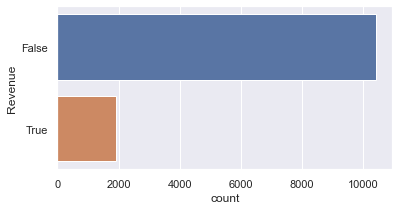

In [11]:
#  Revenue

fig, ax = plt.subplots(1, 1, figsize=(6,3))
g = sns.countplot(y="Revenue", data=data)

print(100*data["Revenue"].value_counts()/data.shape[0])

### Administrative_Duration Column Analysis

#### How many customers go to Administrative pages and end with purchase ?

Text(0, 0.5, 'Administrative')

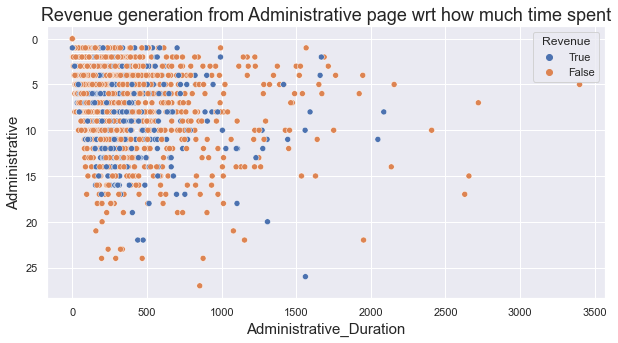

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Administrative_Duration', y = 'Administrative', hue = 'Revenue',
               data = data, hue_order = [True,False])
plt.title("Revenue generation from Administrative page wrt how much time spent", fontsize=18)
plt.xlabel("Administrative_Duration", fontsize=15)
plt.ylabel("Administrative", fontsize=15)

#####  Checking for effect of time spent on Admin page i.e Administrative_Duration on Revenue generation

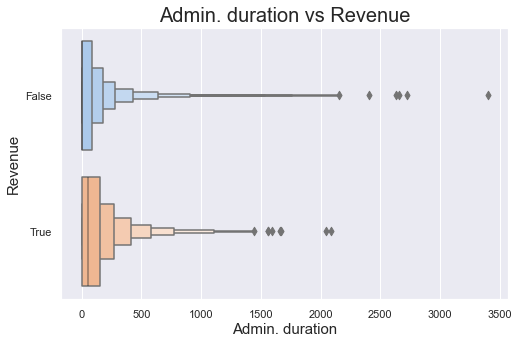

In [13]:
# boxenplot for Administrative duration vs revenue

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['Administrative_Duration'], data['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 20)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

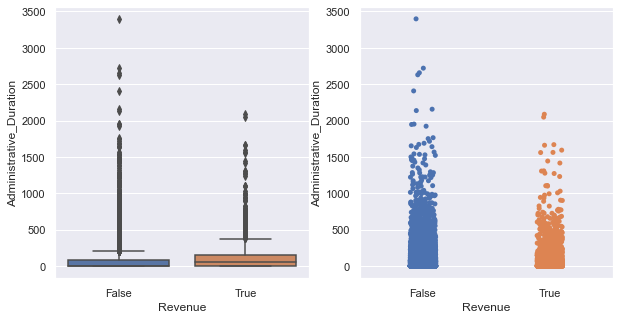

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
g = sns.boxplot(y="Administrative_Duration", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="Administrative_Duration", x="Revenue", data=data, ax=ax[1], 
                 orient="vertical")

Null Hypothesis(H0) : There is no difference between means of the two groups.

Alternative hypothesis(H1) : There is a difference between means of the two groups.

In [15]:
# Hypothesis test on Administrative_Duration column by Implementing  t-test

t_stat, p_val = ttest_ind(a=data.query("Revenue == True")["Administrative_Duration"], 
                        b=data.query("Revenue == False")['Administrative_Duration'])
print(f"p-value : {p_val}")
print(f"t-statistics : {t_stat}")

# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 2.146513634744256e-25
t-statistics : 10.436882428979535
We reject null hypothesis


In [16]:
# Hypothesis test on Administrative_Duration column by implementing Two Sample Z-Test   

z_test ,p_val = stests.ztest(x1=data.query("Revenue == True")["Administrative_Duration"], 
                             x2=data.query("Revenue == False")["Administrative_Duration"],
                             value=0,
                             alternative = 'two-sided')  
print(f"p-value : {p_val}")  
print(f"z-statistics : {t_stat}")


# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 1.6824549959977114e-25
z-statistics : 10.436882428979535
We reject null hypothesis


##### Observation from  Asministrative_Duration vs Revenue
* Administrative_Duration is exponentially distributed for both purchased(True) or not purchased(False).
* We also see there are so many outliers in not puchased(False) according to Administrative_Duration.
* The amount of time spent on administrative page is also significantly different for each other.


### Informational_Duration column Analysis

#### How many customers go to Informational pages and end with a purchase 

Text(0, 0.5, 'Informational')

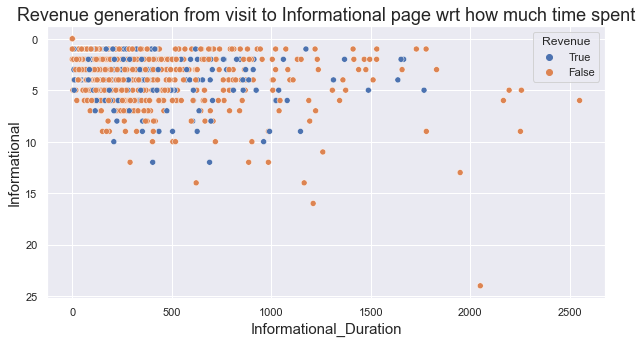

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Informational_Duration', y = 'Informational', hue = 'Revenue',
               data = data, hue_order = [True,False])
plt.title("Revenue generation from visit to Informational page wrt how much time spent", 
          fontsize=18)
plt.xlabel("Informational_Duration", fontsize=15)
plt.ylabel("Informational", fontsize=15)

Not much can be inferred with this plot.


####  Checking for effect of time spent on Informational page i.e Informational_Duration on Revenue generation

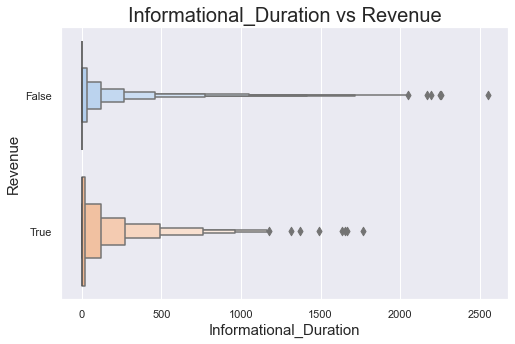

In [18]:
# boxenplot for Administrative duration vs revenue

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['Informational_Duration'], data['Revenue'], palette = 'pastel', orient='h')
plt.title('Informational_Duration vs Revenue', fontsize = 20)
plt.xlabel('Informational_Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

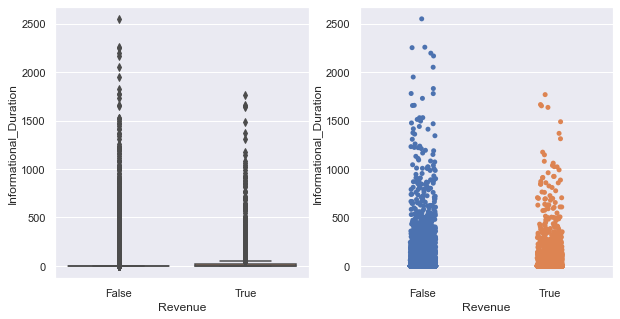

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
g = sns.boxplot(y="Informational_Duration", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="Informational_Duration", x="Revenue", data=data, ax=ax[1], 
                 orient="vertical")

Null Hypothesis(H0)        : There is no difference between means of two groups.

Alternative Hypothesis(H1) : There is difference between means of two groups.

In [20]:
# Hypothesis test on Informational_Duration column by Implementing  t-test

t_stat, p_val = ttest_ind(a=data.query("Revenue == True")["Informational_Duration"], 
                        b=data.query("Revenue == False")['Informational_Duration'])
print(f"p-value : {p_val}")
print(f"t-statistics : {t_stat}")

# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 5.282870860721332e-15
t-statistics : 7.829853965264804
We reject null hypothesis


In [21]:
# Hypothesis test on Informational_Duration column by implementing Two Sample Z-Test   

z_test ,p_val = stests.ztest(x1=data.query("Revenue == True")["Informational_Duration"], 
                             x2=data.query("Revenue == False")["Informational_Duration"],
                             value=0,
                             alternative = 'two-sided')  
print(f"p-value : {p_val}")  
print(f"z-statistics : {t_stat}")


# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 4.884369711485758e-15
z-statistics : 7.829853965264804
We reject null hypothesis


##### Observations from Informational_Duration vs Revenue
* Informational_Duration is exponentially distributed for both purchased(True) or not puchased(False).
* We also see there are so many outliers in not puchased(False) according to Informational_Duration.
* The amount of time spent on Informational_Duration is also different for each group.

### Analysis on  ProductRelated_Duration  column

#### How many customers go to ProductRelated pages and end with a purchase 

Text(0, 0.5, 'ProductRelated')

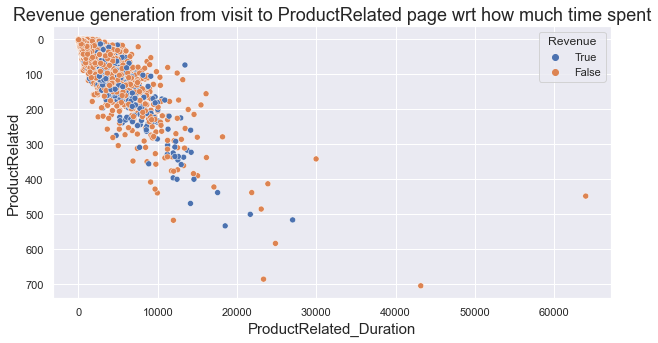

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'ProductRelated_Duration', y = 'ProductRelated', hue = 'Revenue',
               data = data, hue_order = [True,False])
plt.title("Revenue generation from visit to ProductRelated page wrt how much time spent", 
          fontsize=18)
plt.xlabel("ProductRelated_Duration", fontsize=15)
plt.ylabel("ProductRelated", fontsize=15)

There seems to be a potential difference observable.



####  Checking for effect of time spent on ProductRelated page i.e ProductRelated_Duration on Revenue generation

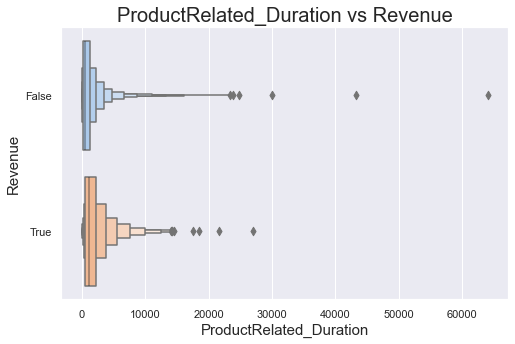

In [23]:
# boxenplot for Administrative duration vs revenue

plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ProductRelated_Duration'], data['Revenue'], palette = 'pastel', orient='h')
plt.title('ProductRelated_Duration vs Revenue', fontsize = 20)
plt.xlabel('ProductRelated_Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

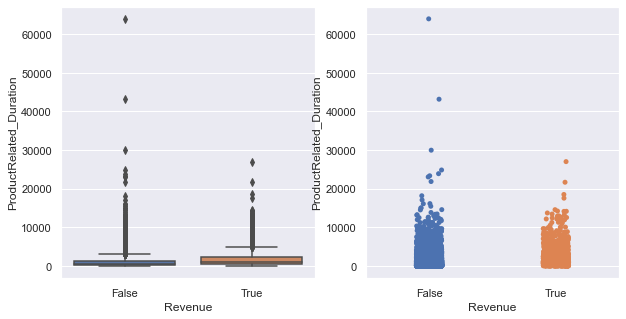

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
g = sns.boxplot(y="ProductRelated_Duration", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="ProductRelated_Duration", x="Revenue", data=data, ax=ax[1], 
                 orient="vertical")

Null Hypothesis(H0)        : There is no difference between means of two groups.

Alternative Hypothesis(H1) : There is difference between means of two groups.

In [25]:
# Hypothesis test on ProductRelated_Duration column by Implementing  t-test

t_stat, p_val = ttest_ind(a=data.query("Revenue == True")["ProductRelated_Duration"], 
                        b=data.query("Revenue == False")['ProductRelated_Duration'])
print(f"p-value : {p_val}")
print(f"t-statistics : {t_stat}")

# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 6.115338253467455e-65
t-statistics : 17.11804905311505
We reject null hypothesis


In [26]:
# Hypothesis test on ProductRelated_Duration column by implementing Two Sample Z-Test   

z_test ,p_val = stests.ztest(x1=data.query("Revenue == True")["ProductRelated_Duration"], 
                             x2=data.query("Revenue == False")["ProductRelated_Duration"],
                             value=0,
                             alternative = 'two-sided')  
print(f"p-value : {p_val}")  
print(f"z-statistics : {t_stat}")


# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 1.08863060591944e-65
z-statistics : 17.11804905311505
We reject null hypothesis


##### observation from ProductRelated_Duration ve Revenue Analysis
* ProductRelated_Duration is exponentially distributed for both purchased(True) or not puchased(False).
* We also see there are so many outliers in not puchased(False) according to ProductRelatedDuration.
* The number of visit to an ProductRelated page is different for each group.

#### Analysis on All Pages (Administrative + Informational + ProductRelated)

#### Now to see what is the effect all page visit on Revenue

If all cthree kinds of page visits show significant difference on Revenue, here we have to check can a combined feature create a strong effect ?

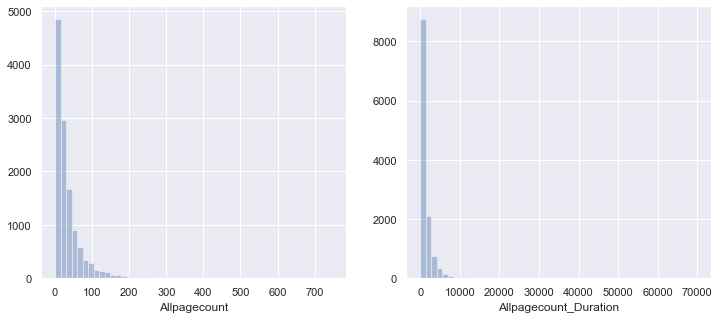

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
g = sns.distplot(a=data['Allpagecount'], ax=ax[0], kde=False)
g = sns.distplot(a=data['Allpagecount_Duration'], ax=ax[1], kde=False)

<AxesSubplot:>

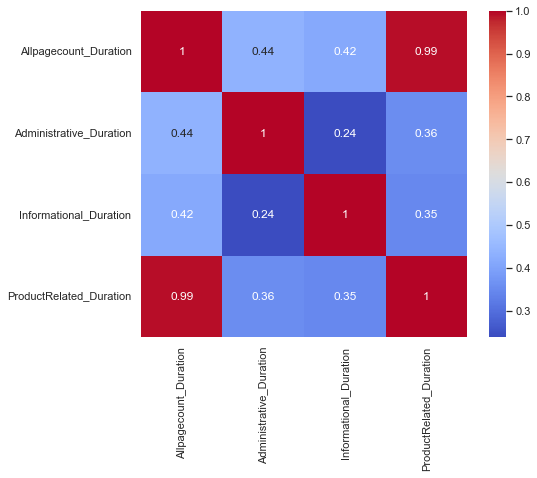

In [28]:
cols = ['Allpagecount','Administrative', 'Informational', 'ProductRelated', 
        'Allpagecount_Duration',
        'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

plt.figure(figsize=(8,6))
sns.heatmap(data[cols].corr(),  annot=True, cmap='coolwarm', square=True)

There are strong correlation here. It may be prudent to remove some features while modelling.

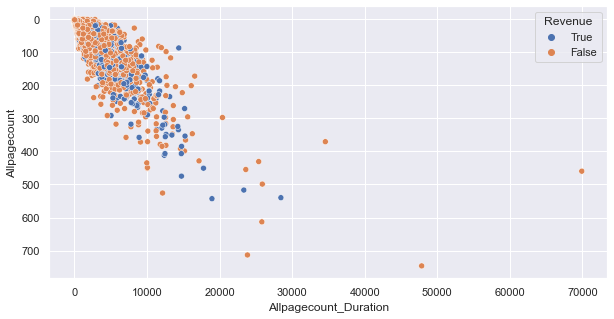

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
g = sns.scatterplot(x="Allpagecount_Duration", y="Allpagecount", hue='Revenue', data=data,
                   ax=ax, hue_order=[True,False])

There seems to be a potential difference observable.

Now, we have to check how do each of the variables affect the Revenue outcome for each group.

##### Does the time spent on All pages have an effect as well ?

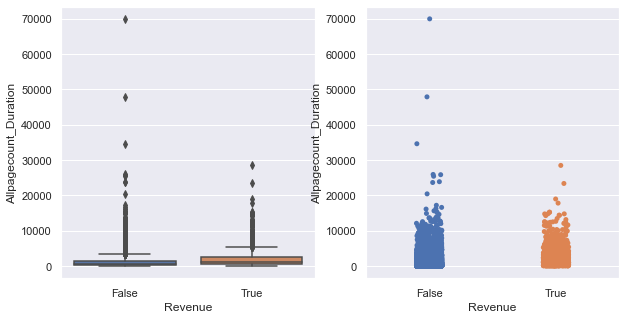

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
g = sns.boxplot(y="Allpagecount_Duration", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="Allpagecount_Duration", x="Revenue", data=data, ax=ax[1], orient="vertical")

Null Hypothesis(H0)        : There is no difference between means of two groups.

Alternative Hypothesis(H1) : There is difference between means of two groups.

In [31]:
# Hypothesis test on Allpagecount_Duration column by Implementing  t-test

t_stat, p_val = ttest_ind(a=data.query("Revenue == True")["Allpagecount_Duration"], 
                        b=data.query("Revenue == False")['Allpagecount_Duration'])
print(f"p-value : {p_val}")
print(f"t-statistics : {t_stat}")

# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 4.470593126274206e-68
t-statistics : 17.54345515460243
We reject null hypothesis


In [32]:
# Hypothesis test on Allpagecount_Duration column by implementing Two Sample Z-Test   

z_test ,p_val = stests.ztest(x1=data.query("Revenue == True")["Allpagecount_Duration"], 
                             x2=data.query("Revenue == False")["Allpagecount_Duration"],
                             value=0,
                             alternative = 'two-sided')  
print(f"p-value : {p_val}")  
print(f"z-statistics : {t_stat}")


# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

p-value : 6.674314868474983e-69
z-statistics : 17.54345515460243
We reject null hypothesis


### Summary
Features such as "Informational" and "ProductRelated" appear to have strong predictive power.

All features passed statistical significance tests.

Two new features were created here.

AllPageCount

AllPageCount_Duration

### Bounce Rates
Percentage of people who enter the site and leave without triggering any other requests to the analytics server.

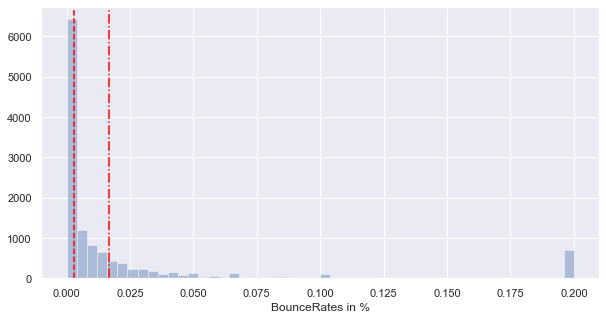

In [33]:
# Distribution plot showing BounceRates in % 

fig, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.distplot(data["BounceRates in %"], ax=ax, kde=False)
l = g.axvline(x=np.percentile(data["BounceRates in %"], 50), linestyle="--",color="red")
l = g.axvline(x=np.percentile(data["BounceRates in %"], 75), linestyle="-.", color="red")


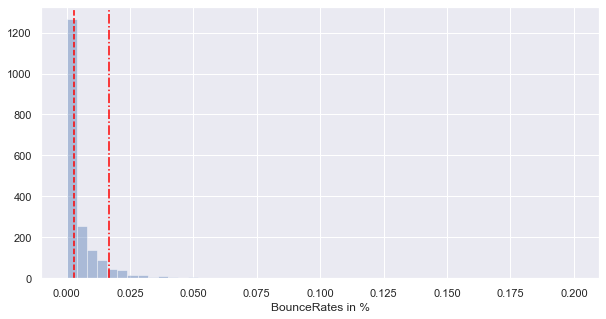

In [34]:
# Distribution plot showing BounceRates in % 

q = "Revenue==True"
data.query(q)[["BounceRates in %"]]

fig, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.distplot(data.query(q)["BounceRates in %"], ax=ax, kde=False)
l = g.axvline(x=np.percentile(data["BounceRates in %"], 50), linestyle="--",color="red")
l = g.axvline(x=np.percentile(data["BounceRates in %"], 75), linestyle="-.", color="red")


How do bounce rates vary for each Revenue Group?

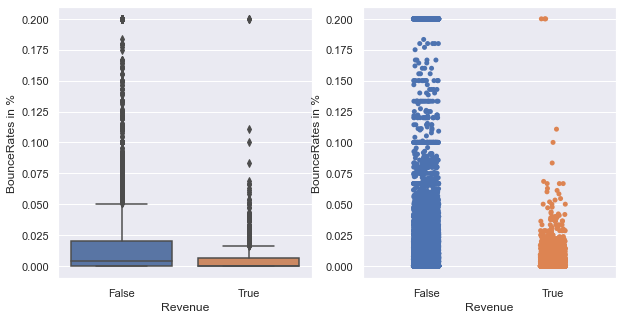

In [35]:
# BounceRates in %' vs Revenue

fig, ax = plt.subplots(1,2,figsize=(10,5))
g = sns.boxplot(y="BounceRates in %", x="Revenue", data=data, ax=ax[0], orient='vertical')
g = sns.stripplot( y="BounceRates in %", x="Revenue", data=data, ax=ax[1],  
                  orient = 'vertical')


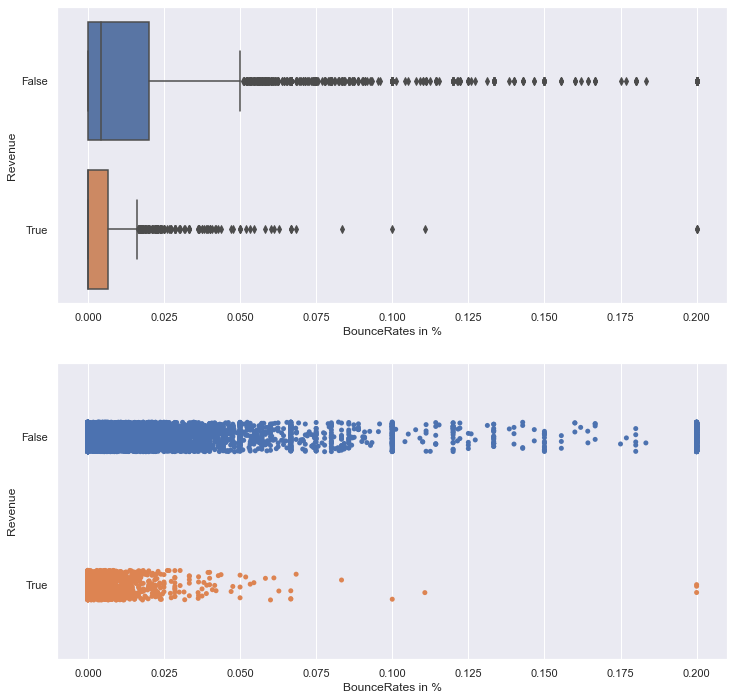

In [36]:
f, ax = plt.subplots(2,1,figsize=(12,12))
g = sns.boxplot(x="BounceRates in %", y="Revenue", data=data, ax=ax[0], orient='horizontal')
g = sns.stripplot( x="BounceRates in %", y="Revenue", data=data, ax=ax[1], 
                 orient = 'horizontal')


In [37]:
# Hypothesis Testing

ztest ,p_val = stests.ztest(x1=data.query("Revenue==True")['BounceRates in %'], 
                           x2=data.query("Revenue==False")['BounceRates in %'], 
                           value=0,
                           alternative='two-sided')
print(float(p_val))
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

3.063945737990013e-64
We reject null hypothesis


In [38]:
q = "Revenue==True"
data.query(q)[["BounceRates in %"]].describe()

BounceRates in %
count       1908.000000
mean           0.005117
std            0.012185
min            0.000000
25%            0.000000
50%            0.000000
75%            0.006452
max            0.200000

<AxesSubplot:>

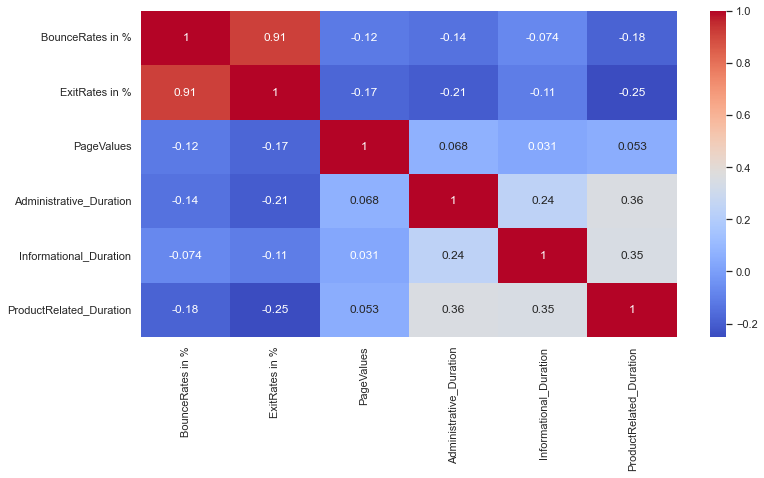

In [39]:
cols = ["BounceRates in %", "ExitRates in %", "PageValues", "SpecialDay (probability)",
        "Administrative", "Informational", "ProductRelated", 
        "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
plt.figure(figsize=(12,6))
sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm')

Do pages with high bounce rates lead to Revenue?

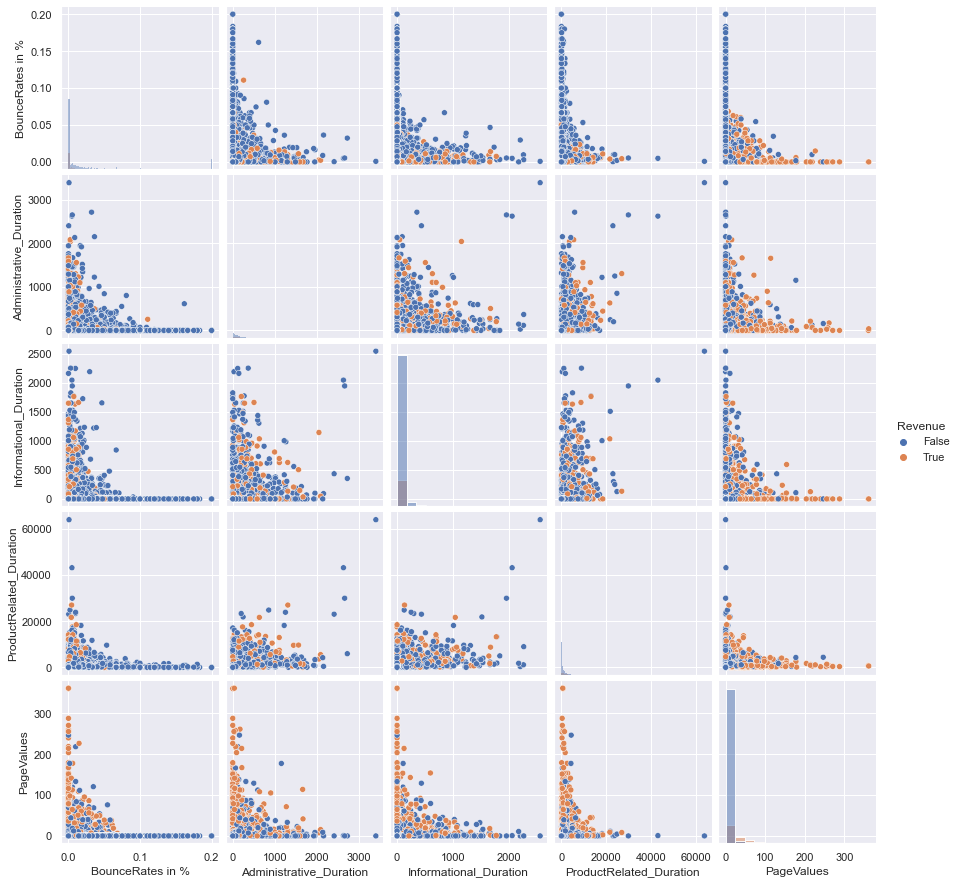

In [40]:
cols = ["BounceRates in %", 
        "Administrative", "Informational", "ProductRelated", 
        "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", 
        "Revenue", "PageValues"]
sns.pairplot(data[cols], hue='Revenue', diag_kind='hist')

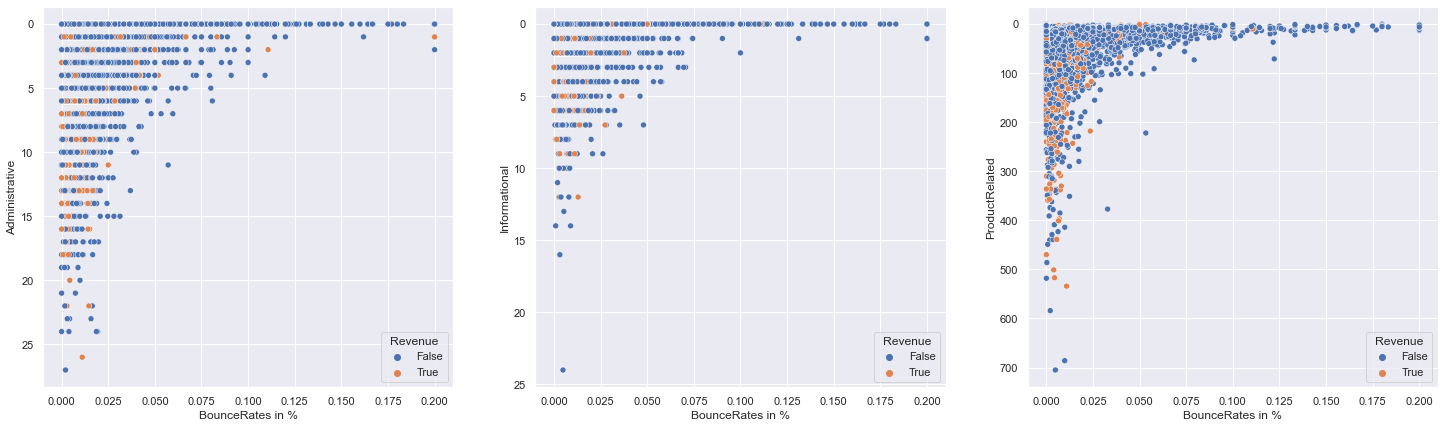

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(25,7))
g = sns.scatterplot(x="BounceRates in %", y="Administrative", hue="Revenue", 
                    data=data, ax=ax[0])
g = sns.scatterplot(x="BounceRates in %", y="Informational", hue="Revenue", 
                    data=data, ax=ax[1])
g = sns.scatterplot(x="BounceRates in %", y="ProductRelated", hue="Revenue", 
                    data=data, ax=ax[2])

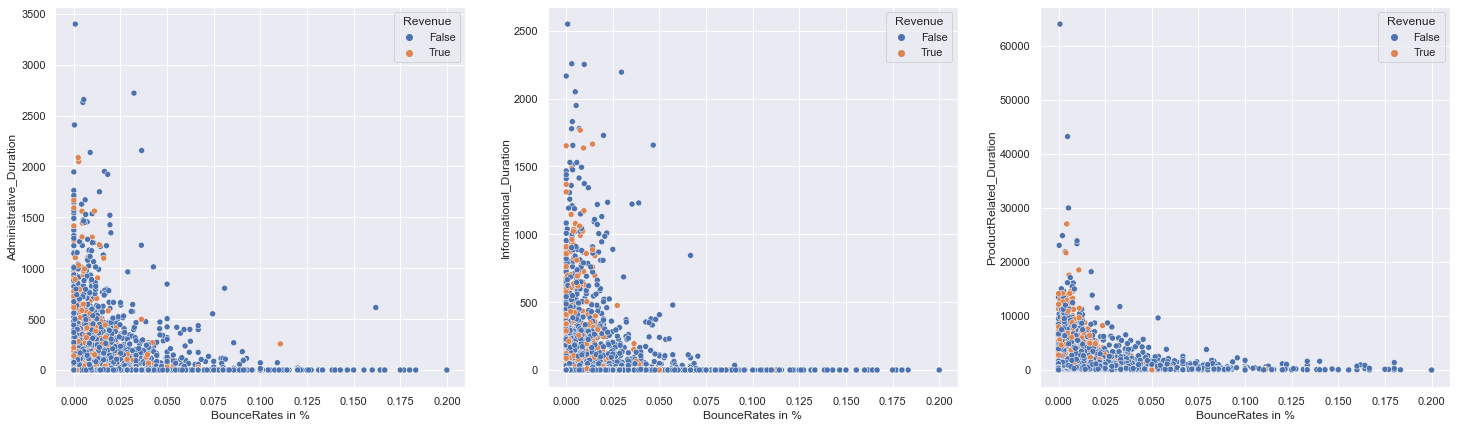

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(25,7))
g = sns.scatterplot(x="BounceRates in %", y="Administrative_Duration", hue="Revenue", 
                    data=data, ax=ax[0])
g = sns.scatterplot(x="BounceRates in %", y="Informational_Duration", hue="Revenue", 
                    data=data, ax=ax[1])
g = sns.scatterplot(x="BounceRates in %", y="ProductRelated_Duration", hue="Revenue", 
                    data=data, ax=ax[2])

##### Observation on BounceRates in %
* Most revenue generating visits happen for pages with low bounce rates.
* We see here BounceRates is exponentially distributed for both purchased(True) or 
not puchased(False).
* We also see there are so many outliers in not puchased(False) according to ExitRates.
* BounceRates is highly influenced to buy a product or not.

### ExitRates in %
The percentage of pageviews on the website that end at that specific page.

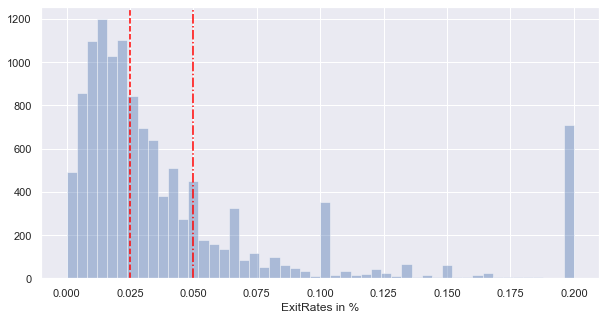

In [43]:
# Distribution of ExitRates in %

fig, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.distplot(data["ExitRates in %"], ax=ax, kde=False)
l = g.axvline(x=np.percentile(data["ExitRates in %"], 50), linestyle="--", color="red")
l = g.axvline(x=np.percentile(data["ExitRates in %"], 75), linestyle="-.", color="red")

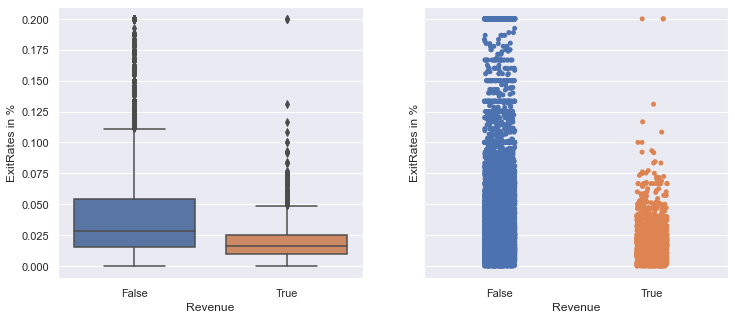

In [44]:
f, ax = plt.subplots(1,2,figsize=(12,5), sharey=True)
g = sns.boxplot(y="ExitRates in %", x="Revenue", data=data, ax=ax[0], orient='vertical')
g = sns.stripplot( y="ExitRates in %", x="Revenue", data=data, ax=ax[1], orient = 'vertical')

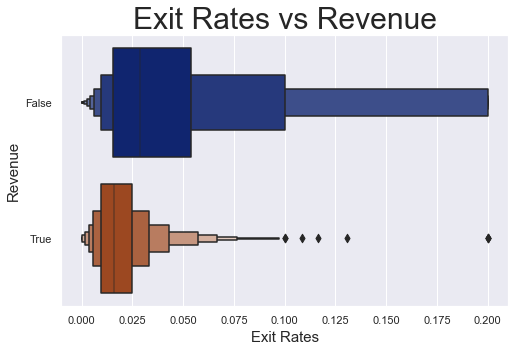

In [45]:
# boxenplot for exit rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ExitRates in %'], data['Revenue'], palette = 'dark', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

In [46]:
# Hypothesis Testing

ztest ,p_val = stests.ztest(x1=data.query("Revenue==True")['ExitRates in %'], 
                           x2=data.query("Revenue==False")['ExitRates in %'], 
                           value=0,
                           alternative='two-sided')
print(float(p_val))
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

4.004837243030868e-122
We reject null hypothesis


Do pages with high ExitRates lead to Revenue?

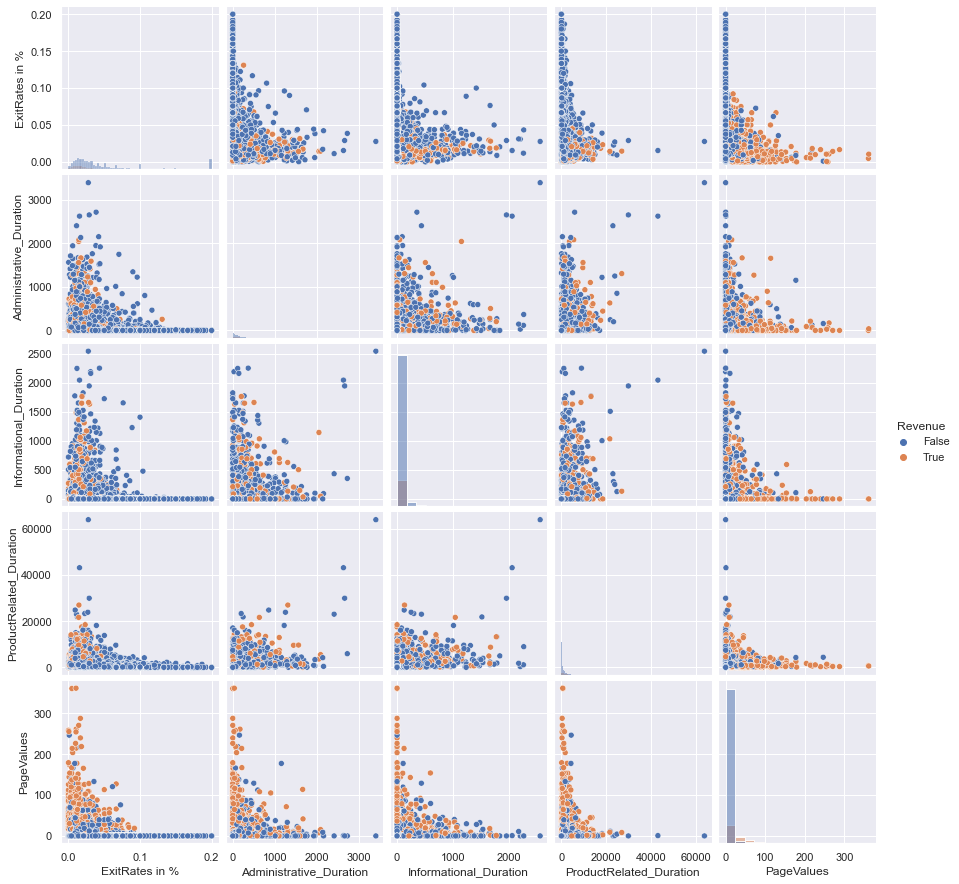

In [47]:
cols = ["ExitRates in %", 
        "Administrative", "Informational", "ProductRelated", 
        "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", 
        "Revenue", "PageValues"]
sns.pairplot(data[cols], hue='Revenue', diag_kind='hist')

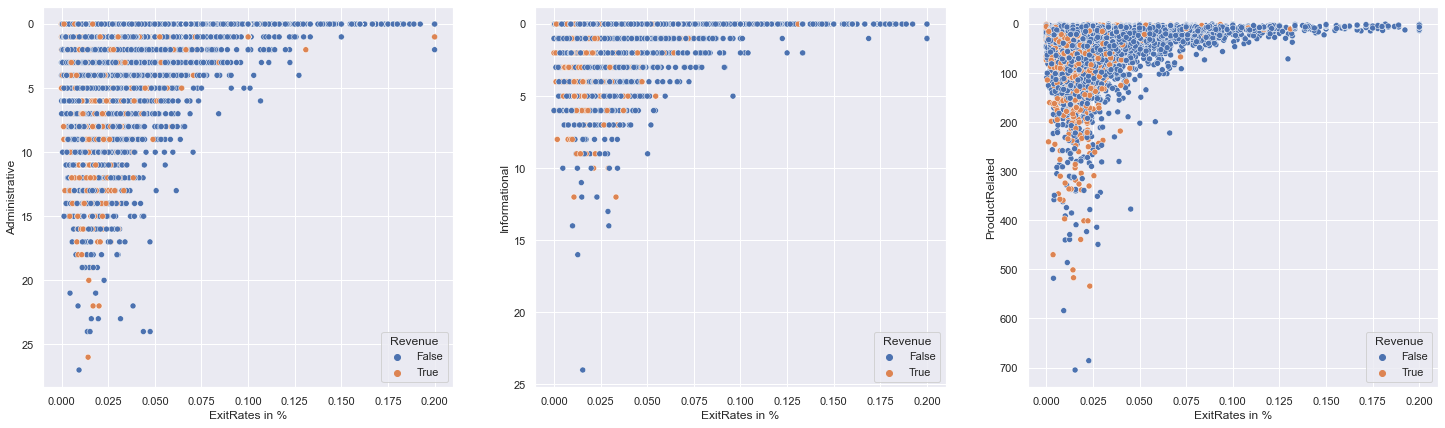

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(25,7))
g = sns.scatterplot(x="ExitRates in %", y="Administrative", hue="Revenue", 
                    data=data, ax=ax[0])
g = sns.scatterplot(x="ExitRates in %", y="Informational", hue="Revenue", 
                    data=data, ax=ax[1])
g = sns.scatterplot(x = "ExitRates in %", y="ProductRelated", hue="Revenue", 
                    data=data, ax=ax[2])

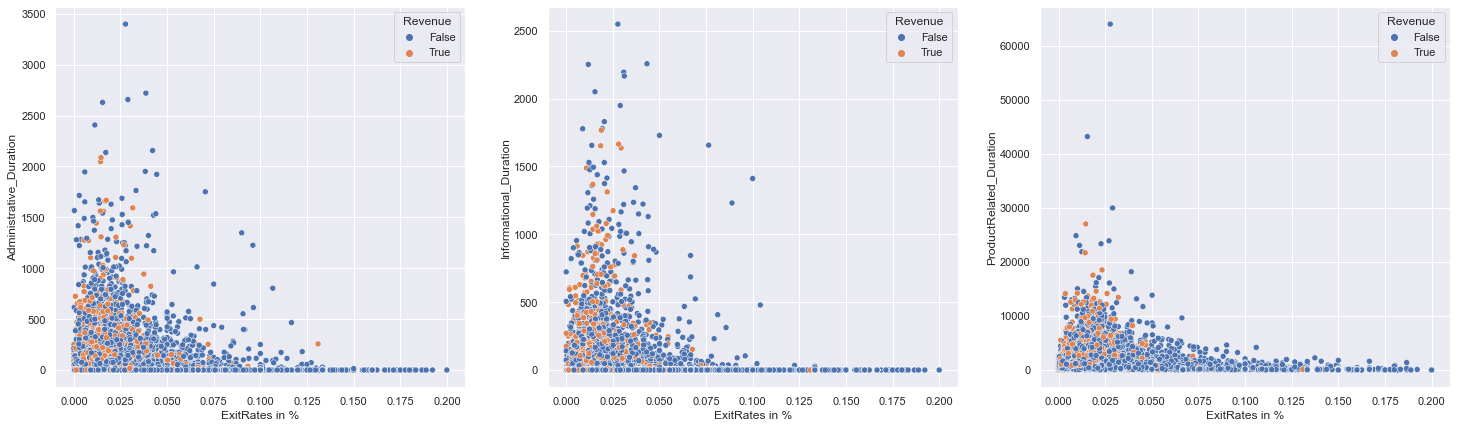

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(25,7))
g = sns.scatterplot(x="ExitRates in %", y="Administrative_Duration", hue="Revenue", 
                    data=data, ax=ax[0])
g = sns.scatterplot(x="ExitRates in %", y="Informational_Duration", hue="Revenue", 
                    data=data, ax=ax[1])
g = sns.scatterplot(x="ExitRates in %", y="ProductRelated_Duration", hue="Revenue", 
                    data=data, ax=ax[2])

##### Observation from ExitRates in % column analysis
* There are so many outliers in not puchased(False) according to ExitRates.
* Most revenue generating visits happen for pages with low bounce rates.

### PageValues
Average value for a webpage a user visited before completing an e-commerce transaction.

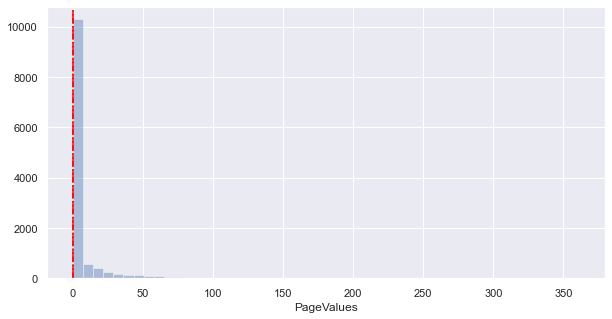

In [50]:
# Distribution of ExitRates in %

fig, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.distplot(data["PageValues"], ax=ax, kde=False)
l = g.axvline(x=np.percentile(data["PageValues"], 50), linestyle="--", color="red")
l = g.axvline(x=np.percentile(data["PageValues"], 75), linestyle="-.", color="red")

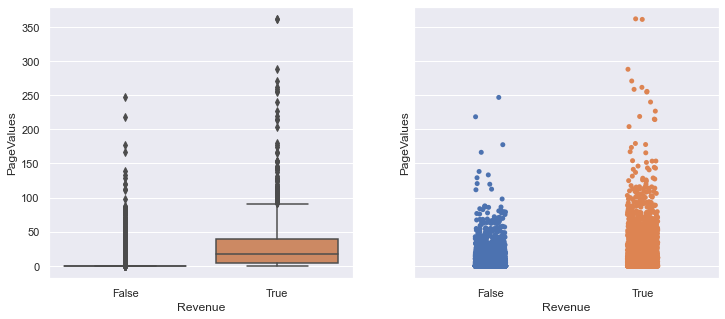

In [51]:
f, ax = plt.subplots(1,2,figsize=(12,5), sharey=True)
g = sns.boxplot(y="PageValues", x="Revenue", data=data, ax=ax[0], orient='vertical')
g = sns.stripplot( y="PageValues", x="Revenue", data=data, ax=ax[1], orient = 'vertical')

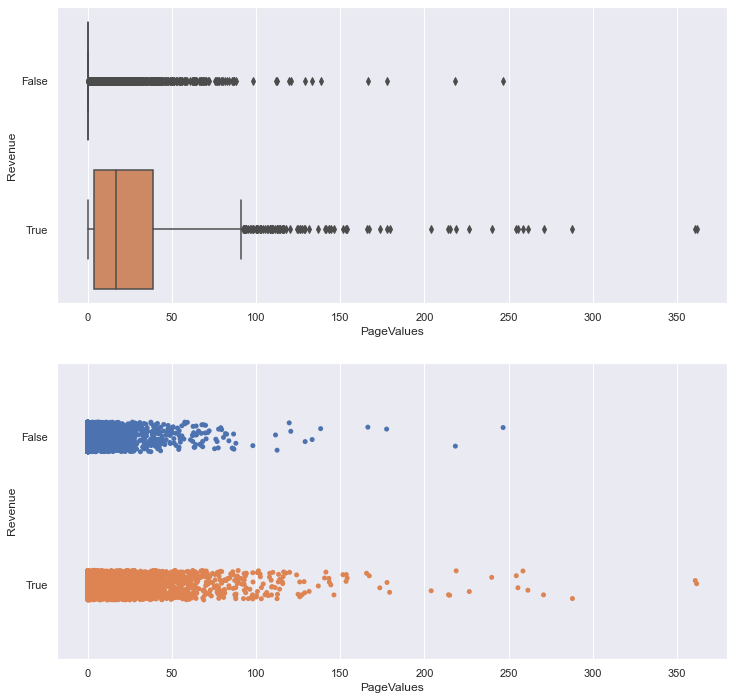

In [52]:
f, ax = plt.subplots(2,1,figsize=(12,12))
g = sns.boxplot(x="PageValues", y="Revenue", data=data, ax=ax[0], orient='horizontal')
g = sns.stripplot( x="PageValues", y="Revenue", data=data, ax=ax[1], 
                 orient = 'horizontal')


There is a strong predictive power with page values on whether the user session will result in a purchase.

In [53]:
q = "Revenue==True"
data.query(q)[["PageValues"]].describe()

PageValues
count  1908.000000
mean     27.264518
std      35.191954
min       0.000000
25%       3.641144
50%      16.758134
75%      38.897742
max     361.763742

In [54]:
th = data.query("Revenue==True")[["PageValues"]].describe().loc["min"].values[0]
q = "PageValues>"+str(th)
print(q)
display(
    data["Revenue"].value_counts(),
    100*(data["Revenue"].value_counts()/data.shape[0]),
    data.query(q)["Revenue"].value_counts(),
    100*(data.query(q)["Revenue"].value_counts()/data.query(q).shape[0])
)

PageValues>0.0


False    10422
True      1908
Name: Revenue, dtype: int64

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

True     1538
False    1192
Name: Revenue, dtype: int64

True     56.336996
False    43.663004
Name: Revenue, dtype: float64

In [55]:
q="(PageValues==0)&(Revenue==True)"
display(
      data.query(q).head(),
      data.query(q).shape
)


Administrative  Administrative_Duration Informational  \
5490              3                13.733333             1   
5514              1                41.400000             0   
5554             10               491.666667             0   
5561             17               698.133333             1   
5563              3                32.200000             0   

      Informational_Duration ProductRelated  ProductRelated_Duration  \
5490                     2.0             27               407.683333   
5514                     0.0             30               558.611111   
5554                     0.0             48              1939.571111   
5561                     9.0             83              4306.612355   
5563                     0.0             81              1199.616667   

      BounceRates in %  ExitRates in %  PageValues SpecialDay (probability)  \
5490          0.006667        0.011556         0.0                      0.0   
5514          0.009091        0.046465         0.0                      0.0   
5554          0.003774        0.010539         0.0                      0.0   
5561          0.001075        0.019376         0.0                      0.0   
5563          0.000000        0.006173         0.0                      0.0   

     Month OperatingSystems Browser Region TrafficType        VisitorType  \
5490   Jul                2       2      1           4  Returning_Visitor   
5514   Sep                2      10      2           1  Returning_Visitor   
5554   Nov                2       2      7          20  Returning_Visitor   
5561   Oct                7       1      2           1  Returning_Visitor   
5563   Sep                2       2      2           1  Returning_Visitor   

      Weekend  Revenue Allpagecount  Allpagecount_Duration  
5490    False     True           31             423.416667  
5514    False     True           31             600.011111  
5554    False     True           58            2431.237778  
5561     True     True          101            5013.745688  
5563     True     True           84            1231.816667

(370, 20)

43 percent of all visits generate revenue for pages when the pagevalue score is greater than 0

In [56]:
th = data.query("Revenue==True")[["PageValues"]].describe().loc["25%"].values[0]
q = "PageValues>"+str(th)
print(q)
display(
    data["Revenue"].value_counts(),
    100*(data["Revenue"].value_counts()/data.shape[0]),
    data.query(q)["Revenue"].value_counts(),
    100*(data.query(q)["Revenue"].value_counts()/data.query(q).shape[0])
)

PageValues>3.64114439175


False    10422
True      1908
Name: Revenue, dtype: int64

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

True     1431
False     975
Name: Revenue, dtype: int64

True     59.476309
False    40.523691
Name: Revenue, dtype: float64

In [57]:
th = data.query("Revenue==True")[["PageValues"]].describe().loc["50%"].values[0]
q = "PageValues>"+str(th)
print(q)
display(
    data["Revenue"].value_counts(),
    100*(data["Revenue"].value_counts()/data.shape[0]),
    data.query(q)["Revenue"].value_counts(),
    100*(data.query(q)["Revenue"].value_counts()/data.query(q).shape[0])
)

PageValues>16.758133555


False    10422
True      1908
Name: Revenue, dtype: int64

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

True     954
False    404
Name: Revenue, dtype: int64

True     70.250368
False    29.749632
Name: Revenue, dtype: float64

In [58]:
th = data.query("Revenue==True")[["PageValues"]].describe().loc["75%"].values[0]
q = "PageValues>"+str(th)
print(q)
display(
    data["Revenue"].value_counts(),
    100*(data["Revenue"].value_counts()/data.shape[0]),
    data.query(q)["Revenue"].value_counts(),
    100*(data.query(q)["Revenue"].value_counts()/data.query(q).shape[0])
)

PageValues>38.897742445


False    10422
True      1908
Name: Revenue, dtype: int64

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

True     477
False    127
Name: Revenue, dtype: int64

True     78.97351
False    21.02649
Name: Revenue, dtype: float64

In [59]:
# Hypothesis Testing

ztest ,p_val = stests.ztest(x1=data.query("Revenue==True")['PageValues'], 
                           x2=data.query("Revenue==False")['PageValues'], 
                           value=0,
                           alternative='two-sided')
print(float(p_val))
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

0.0
We reject null hypothesis


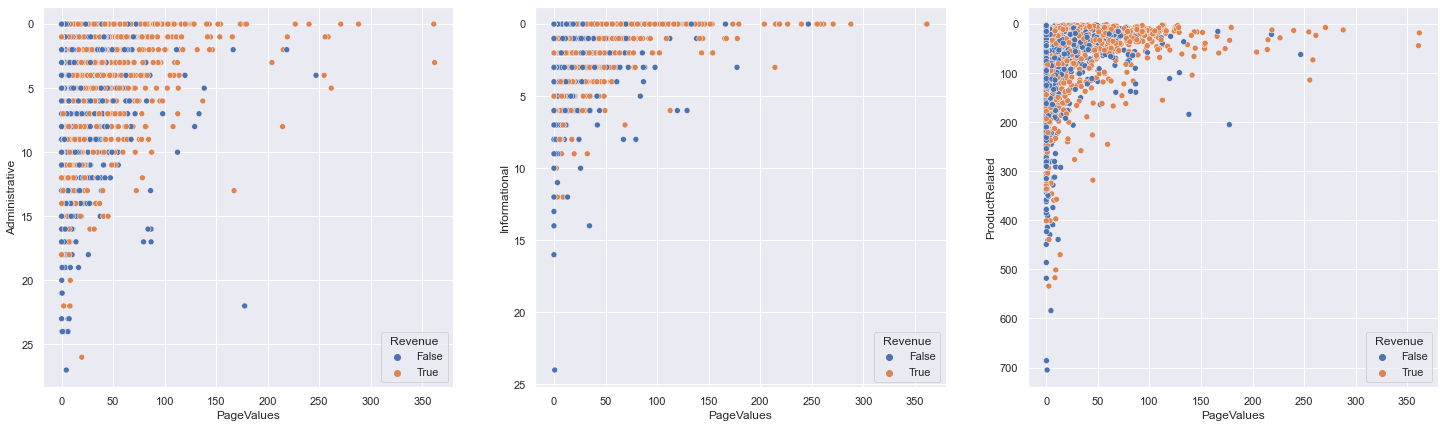

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(25,7))
g = sns.scatterplot(x="PageValues", y="Administrative", hue="Revenue", 
                    data=data, ax=ax[0])
g = sns.scatterplot(x="PageValues", y="Informational", hue="Revenue", 
                    data=data, ax=ax[1])
g = sns.scatterplot(x="PageValues", y="ProductRelated", hue="Revenue", 
                    data=data, ax=ax[2])

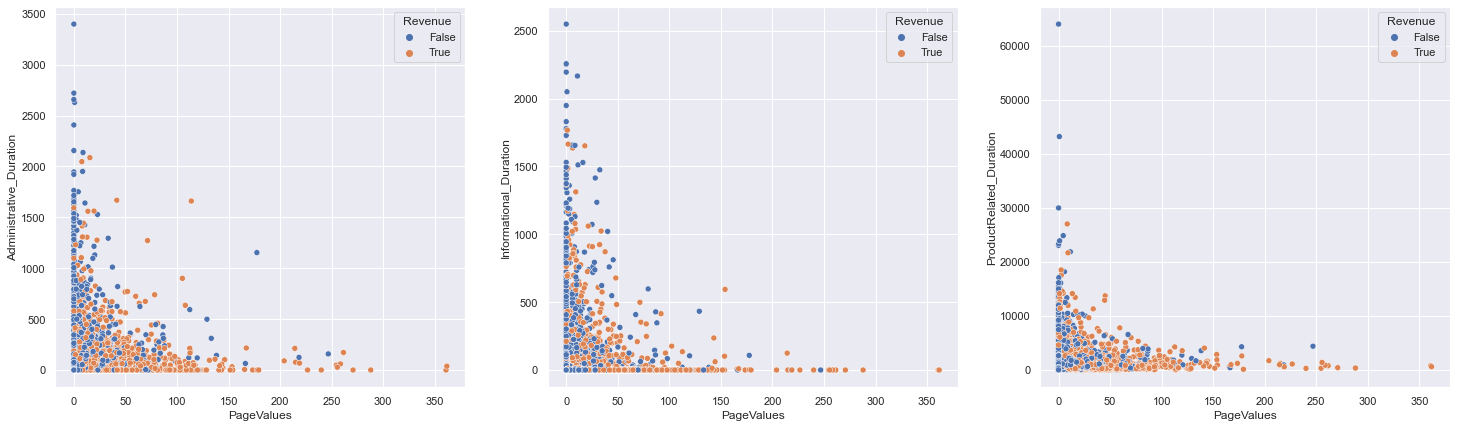

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(25,7))
g = sns.scatterplot(x="PageValues", y="Administrative_Duration", hue="Revenue", 
                    data=data, ax=ax[0])
g = sns.scatterplot(x="PageValues", y="Informational_Duration", hue="Revenue", 
                    data=data, ax=ax[1])
g = sns.scatterplot(x="PageValues", y="ProductRelated_Duration", hue="Revenue", 
                    data=data, ax=ax[2])

##### Observation from 
* We see here PageValues is exponentially distributed for both purchased(True) or not puchased(False).
* We also see there are so many outliers in puchased(True) according to ExitRates.
* Most important things is here PageValues are highly influenced to purchased(True) a product.

### PageValues and BounceRates

In [62]:
data1 = data.copy()

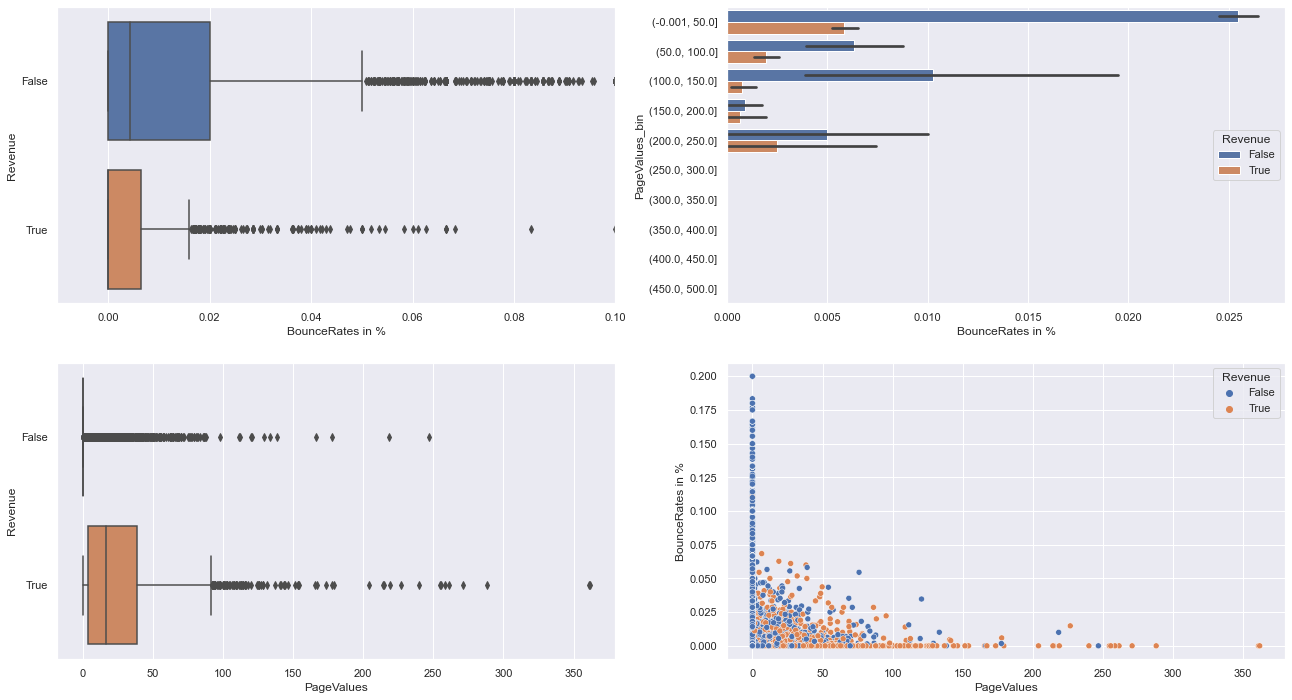

In [63]:
data1["PageValues_bin"] = pd.cut(data["PageValues"], bins=np.linspace(start=0, stop=500, num=11), 
                                include_lowest=True)


fig, ax = plt.subplots(2,2,figsize=(22,12))
g = sns.boxplot(x="BounceRates in %", y="Revenue", data=data1, ax=ax[0][0], orient='horizontal')
g.set(xlim=(-1e-2, 0.1))
g = sns.boxplot(x="PageValues", y="Revenue", data=data1, ax=ax[1][0], orient='horizontal')
g = sns.scatterplot(x="PageValues", y="BounceRates in %", data=data1, ax=ax[1][1], hue="Revenue")
g1 = sns.barplot(y="PageValues_bin", x="BounceRates in %", data=data1, ax=ax[0][1], hue="Revenue")

From above analysis we found that higher page values have lower bounce rates.

What happens if we combine the two variables?

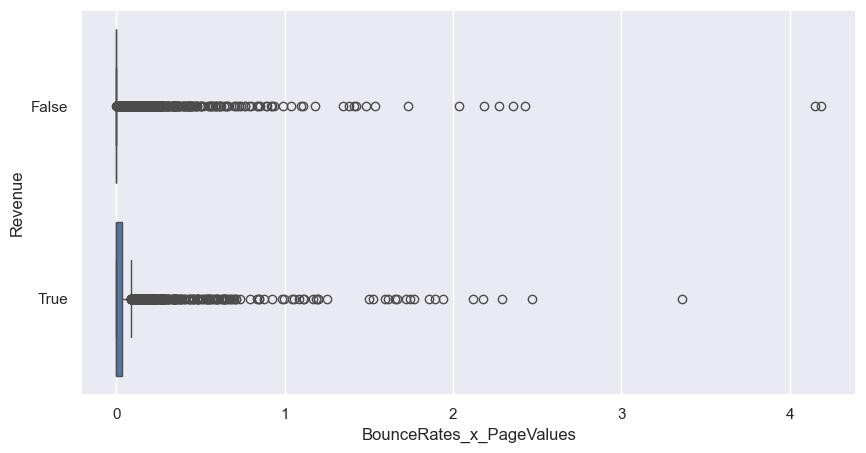

In [69]:
data["BounceRates_x_PageValues"] = data["BounceRates in %"] * data["PageValues"]
fig, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.boxplot(x="BounceRates_x_PageValues", y="Revenue", data=data, ax=ax, orient="horizontal")


In [65]:
# Hypothesis Testing

ztest ,p_val = stests.ztest(x1=data.query("Revenue==True")['BounceRates_x_PageValues'], 
                           x2=data.query("Revenue==False")['BounceRates_x_PageValues'], 
                           value=0,
                           alternative='two-sided')
print(float(p_val))
if p_val < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.031887219372668e-70
We reject null hypothesis


The combined variable significant as well.

Regression analysis can provide further insight on this variable's effect.

### Summary From Google analytics metrics  columns
* Bounce Rates and Exit values have a high correlation
* Bounce Rates have strong predictive power for target variable
* Product Value have strong predictive power for target variable
* Product Value x Bounce Rates have strong predictive power for target variable
* All variables passed statistical significance tests

###### Features created -
*Product value X bounce rates

In [66]:
numerical_columns = ["Administrative_Duration", "Informational_Duration", 
                     "ProductRelated_Duration", "Allpagecount_Duration", "BounceRates in %",
                    "ExitRates in %", "PageValues",
                    "Allpagecount_Duration", "BounceRates_x_PageValues"]


from statsmodels.stats import weightstats as stests 

# Two-Sample T-test
zcol = []
zpval = []
zs = []
for n in numerical_columns:
    zcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = data[n][data['Revenue'] == False]
    g2 = data[n][data['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    
    ztest, p_val = stests.ztest(g1, g2, value=0, alternative='two-sided')
    zpval.append(round(p_val, 4))
    if p_val < 0.05:
        zs.append("*") # significant
    else:
        zs.append("**") # non significant
        
    
pd.DataFrame({'Feature': zcol, 'P-Value': zpval, 'Significance': zs})

Feature  P-Value Significance
0   Administrative_Duration      0.0            *
1    Informational_Duration      0.0            *
2   ProductRelated_Duration      0.0            *
3     Allpagecount_Duration      0.0            *
4          BounceRates in %      0.0            *
5            ExitRates in %      0.0            *
6                PageValues      0.0            *
7     Allpagecount_Duration      0.0            *
8  BounceRates_x_PageValues      0.0            *

###  Analysis  on Categorical variables with Visualization

In [68]:
cat_cols = ["Allpagecount","Administrative", "Informational", "ProductRelated","Month", 
            "OperatingSystems", "SpecialDay (probability)",
            "Browser", "Region", "TrafficType", "VisitorType", 
            "Weekend"]
data[cat_cols + ["Revenue"]].head()

Allpagecount Administrative Informational ProductRelated Month  \
0            1              0             0              1   Feb   
1            2              0             0              2   Feb   
2            1              0             0              1   Feb   
3            2              0             0              2   Feb   
4           10              0             0             10   Feb   

  OperatingSystems SpecialDay (probability) Browser Region TrafficType  \
0                1                      0.0       1      1           1   
1                2                      0.0       2      1           2   
2                4                      0.0       1      9           3   
3                3                      0.0       2      2           4   
4                3                      0.0       3      1           4   

         VisitorType  Weekend  Revenue  
0  Returning_Visitor    False    False  
1  Returning_Visitor    False    False  
2  Returning_Visitor    False    False  
3  Returning_Visitor    False    False  
4  Returning_Visitor     True    False

In [69]:
# changing  some columns from categorical to numerical for plotting purpose

data["Administrative"] = pd.to_numeric(data["Administrative"], downcast="float")
data["Informational"] = pd.to_numeric(data["Informational"], downcast="float")
data["ProductRelated"] = pd.to_numeric(data["ProductRelated"], downcast="float")
data["Allpagecount"] = pd.to_numeric(data["Allpagecount"], downcast="float")

### Administrative
This is the number of pages of this type (administrative) that the user visited

Text(0, 0.5, 'Count')

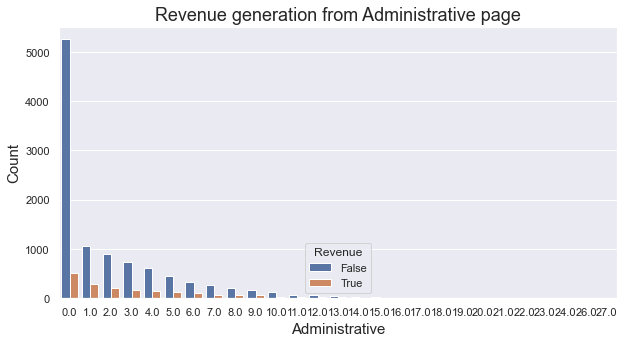

In [70]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Administrative', data = data, hue = 'Revenue')
plt.title("Revenue generation from Administrative page", fontsize=18)
plt.xlabel("Administrative", fontsize=15)
plt.ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

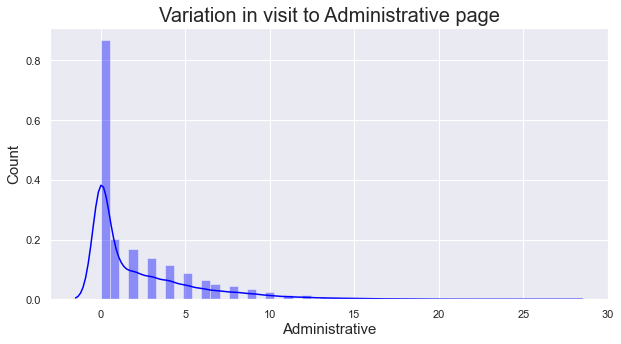

In [71]:
plt.figure(figsize=(10, 5))
sns.distplot(data['Administrative'], color='blue')
plt.title("Variation in visit to Administrative page", fontsize=20)
plt.xlabel("Administrative", fontsize=15)
plt.ylabel("Count", fontsize=15)

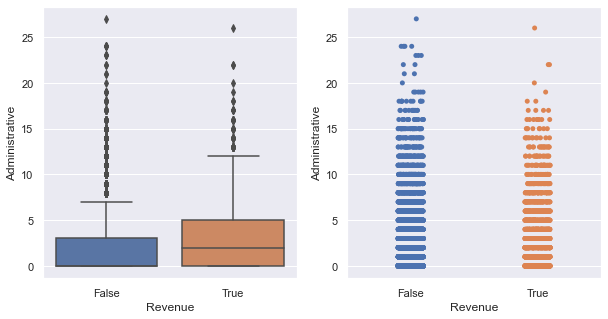

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
g = sns.boxplot(y="Administrative", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="Administrative", x="Revenue", data=data, ax=ax[1], orient="vertical")

##### Hypothesis testing for checking if there is any association between Revenue and Administrative

In [73]:
stat, p_val, dof = chi_sqred_ind_test(data, 'Administrative', 'Revenue', 0.05)

Contigency table: 
 Revenue         False  True
Administrative             
0.0              5254   514
1.0              1063   291
2.0               909   205
3.0               741   174
4.0               612   153
5.0               457   118
6.0               321   111
7.0               272    66
8.0               214    73
9.0               164    61
10.0              121    32
11.0               74    31
12.0               65    21
13.0               37    19
14.0               32    12
15.0               30     8
16.0               16     8
17.0               12     4
18.0               10     2
19.0                5     1
20.0                1     1
21.0                2     0
22.0                2     2
23.0                3     0
24.0                4     0
26.0                0     1
27.0                1     0
Statistic: 414.97675983496345
P-value: 1.092113745322259e-71
DOF: 26
probability=0.950, critical=38.885, stat=414.977
Dependent (reject Null Hypothesis(H0))
Dependent (

##### Observation on Administrative vs Revenue
* Administrative is exponentially distributed for both purchased(True) or not purchased(False).
* We also see there are so many outliers in  according to Administrative.
* Since Null Hypothesis is rejected, that means Administrative and Revenue are not Independent.

### Informational
This is the number of pages of this type (informational) that the user visited.

Text(0, 0.5, 'Count')

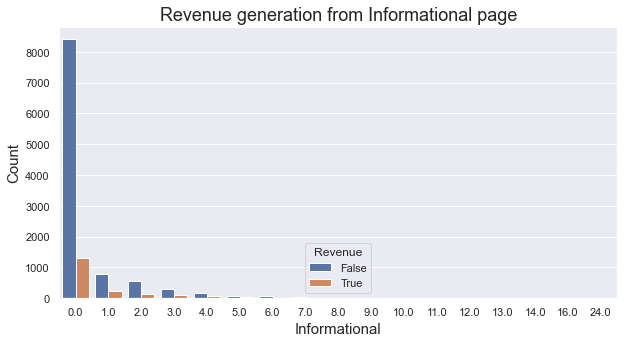

In [74]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Informational', data = data, hue = 'Revenue')
plt.title("Revenue generation from Informational page", fontsize=18)
plt.xlabel("Informational", fontsize=15)
plt.ylabel("Count", fontsize=15)

<AxesSubplot:xlabel='Informational'>

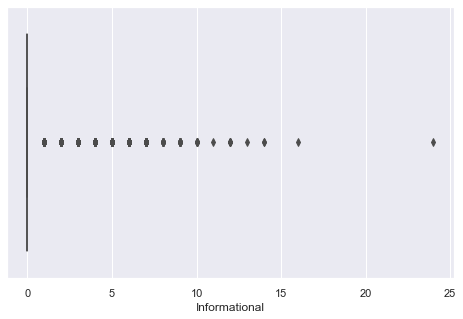

In [75]:
sns.boxplot(data['Informational'])

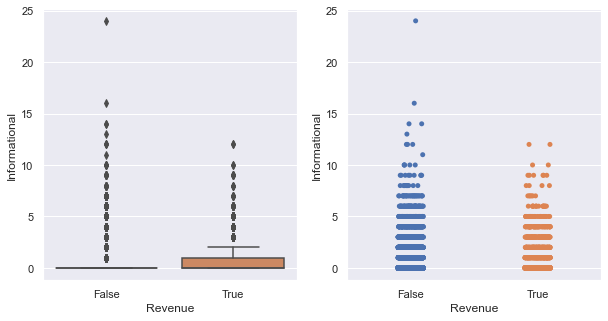

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
g = sns.boxplot(y="Informational", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="Informational", x="Revenue", data=data, ax=ax[1], orient="vertical")

Text(0, 0.5, 'Count')

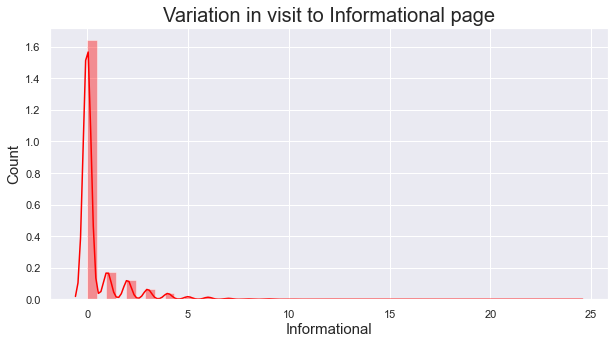

In [77]:
# Distribution of Informational data

plt.figure(figsize=(10, 5))
sns.distplot(data['Informational'], color='red')
plt.title("Variation in visit to Informational page", fontsize=20)
plt.xlabel("Informational", fontsize=15)
plt.ylabel("Count", fontsize=15)

##### Hypothesis testing for checking if there is any association between Revenue and Informational

In [78]:
stat, p_val, dof = chi_sqred_ind_test(data, 'Informational', 'Revenue', 0.05)

Contigency table: 
 Revenue        False  True
Informational             
0.0             8404  1295
1.0              805   236
2.0              574   154
3.0              287    93
4.0              160    62
5.0               68    31
6.0               61    17
7.0               30     6
8.0               10     4
9.0                9     6
10.0               5     2
11.0               1     0
12.0               3     2
13.0               1     0
14.0               2     0
16.0               1     0
24.0               1     0
Statistic: 176.88329005488768
P-value: 3.5466035116226255e-29
DOF: 16
probability=0.950, critical=26.296, stat=176.883
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


##### observation from Informational ve Revenue Analysis
* Informational is exponentially distributed for both purchased(True) or not puchased(False).
* There is significant amount of outliers.
* Since Null Hypothesis is rejected, that means Informational and Revenue are not Independent.

### ProductRelated
This is the number of pages of this type (product related) that the user visited.

Text(0, 0.5, 'Count')

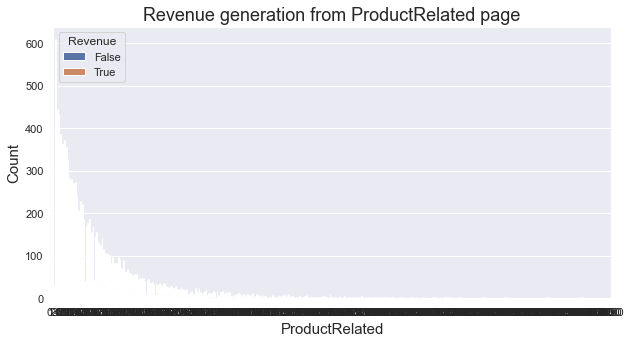

In [79]:
# Distribution of ProductRelated

plt.figure(figsize=(10, 5))
sns.countplot(x = 'ProductRelated', data = data, hue = 'Revenue')
plt.title("Revenue generation from ProductRelated page", fontsize=18)
plt.xlabel("ProductRelated", fontsize=15)
plt.ylabel("Count", fontsize=15)

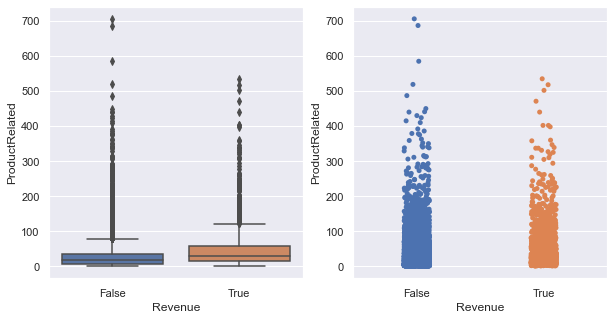

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
g = sns.boxplot(y="ProductRelated", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="ProductRelated", x="Revenue", data=data, ax=ax[1], orient="vertical")

<AxesSubplot:xlabel='ProductRelated'>

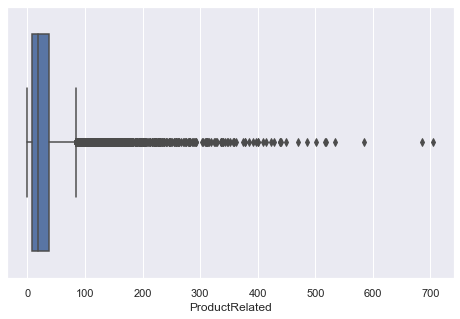

In [81]:
sns.boxplot(data['ProductRelated'])

Text(0, 0.5, 'Count')

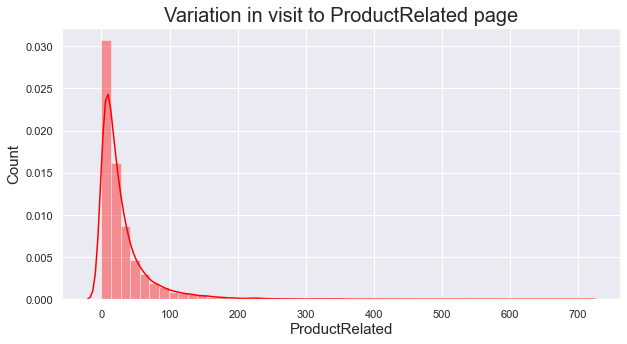

In [82]:
# Distribution of Informational data

plt.figure(figsize=(10, 5))
sns.distplot(data['ProductRelated'], color='red')
plt.title("Variation in visit to ProductRelated page", fontsize=20)
plt.xlabel("ProductRelated", fontsize=15)
plt.ylabel("Count", fontsize=15)

##### Hypothesis testing for checking if there is any association between Revenue and ProductRelated

In [83]:
stat, p_val, dof = chi_sqred_ind_test(data, 'ProductRelated', 'Revenue', 0.05)

Contigency table: 
 Revenue         False  True
ProductRelated             
0.0                32     6
1.0               609    13
2.0               445    20
3.0               433    25
4.0               386    18
5.0               362    20
6.0               372    24
7.0               356    35
8.0               328    42
9.0               283    34
10.0              280    50
11.0              272    36
12.0              273    40
13.0              244    45
14.0              208    43
15.0              230    40
16.0              222    38
17.0              186    40
18.0              171    29
19.0              176    42
20.0              186    39
21.0              157    42
22.0              169    44
23.0              147    33
24.0              157    35
25.0              132    22
26.0              126    29
27.0              141    36
28.0              115    29
29.0              107    28
30.0              105    37
31.0              102    26
32.0               84    35


##### observation from ProductRelated ve Revenue Analysis
* ProductRelated is exponentially distributed for both purchased(True) or not puchased(False).
* There is significant amount of outliers.
* Since Null Hypothesis is rejected, that means ProductRelated and Revenue are not Independent.

### Allpagecount
Allpagecount = Administrative + Informational + ProductRelated

Text(0, 0.5, 'Count')

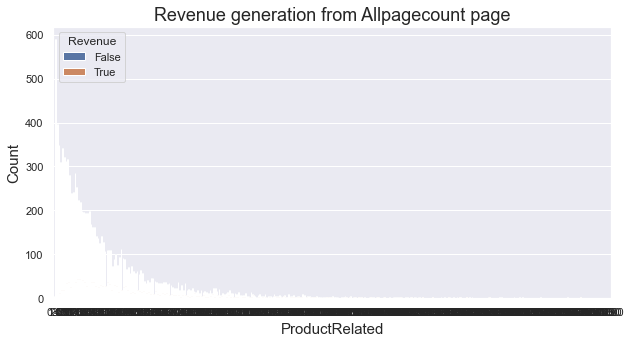

In [84]:
# Distribution of ProductRelated

plt.figure(figsize=(10, 5))
sns.countplot(x = 'Allpagecount', data = data, hue = 'Revenue')
plt.title("Revenue generation from Allpagecount page", fontsize=18)
plt.xlabel("ProductRelated", fontsize=15)
plt.ylabel("Count", fontsize=15)

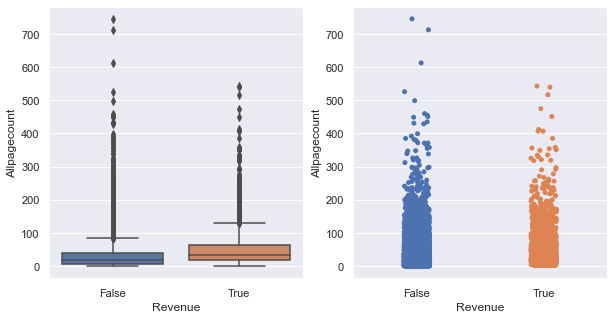

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
g = sns.boxplot(y="Allpagecount", x="Revenue", data=data, ax=ax[0], orient="vertical")
g = sns.stripplot(y="Allpagecount", x='Revenue', data=data, ax=ax[1], orient='vertical')

<AxesSubplot:xlabel='Allpagecount'>

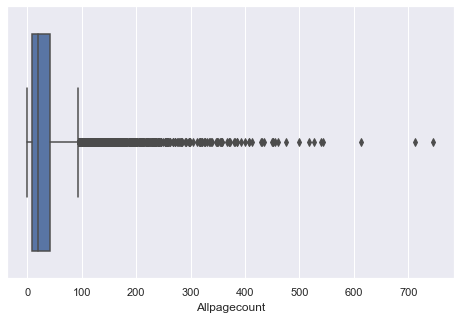

In [86]:
sns.boxplot(data['Allpagecount'])

Text(0, 0.5, 'Count')

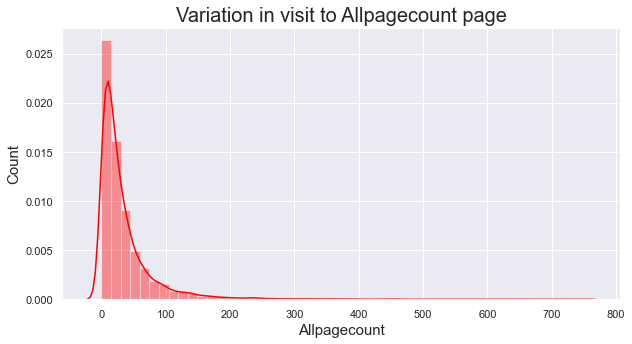

In [87]:
# Distribution of Informational data

plt.figure(figsize=(10, 5))
sns.distplot(data['Allpagecount'], color='red')
plt.title("Variation in visit to Allpagecount page", fontsize=20)
plt.xlabel("Allpagecount", fontsize=15)
plt.ylabel("Count", fontsize=15)

##### Hypothesis testing for checking if there is any association between Revenue and ProductRelated

In [88]:
stat, p_val, dof = chi_sqred_ind_test(data, 'ProductRelated', 'Revenue', 0.05)

Contigency table: 
 Revenue         False  True
ProductRelated             
0.0                32     6
1.0               609    13
2.0               445    20
3.0               433    25
4.0               386    18
5.0               362    20
6.0               372    24
7.0               356    35
8.0               328    42
9.0               283    34
10.0              280    50
11.0              272    36
12.0              273    40
13.0              244    45
14.0              208    43
15.0              230    40
16.0              222    38
17.0              186    40
18.0              171    29
19.0              176    42
20.0              186    39
21.0              157    42
22.0              169    44
23.0              147    33
24.0              157    35
25.0              132    22
26.0              126    29
27.0              141    36
28.0              115    29
29.0              107    28
30.0              105    37
31.0              102    26
32.0               84    35


##### Observation 
The number of visits to combined Allpagecount is significantly different for each group.

### Month
Task is to check what months do most sales happen ?

Text(0, 0.5, 'Count')

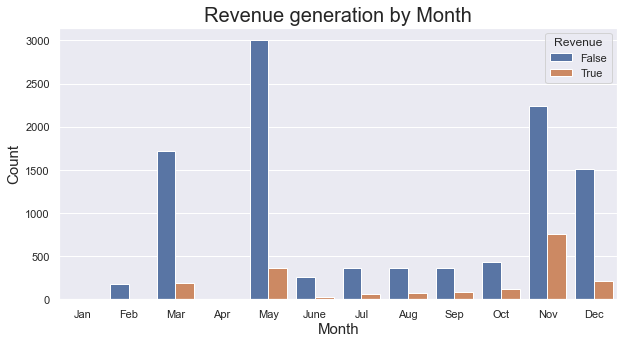

In [89]:
months = [calendar.month_name[i][:3] for i in  range(1,13)]
months[5] = "June"

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(x=data["Month"], data=data, order=months, hue="Revenue")
plt.title("Revenue generation by Month", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Count", fontsize=15)

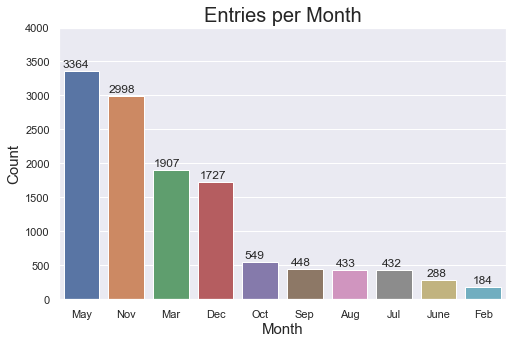

In [90]:
monthly = data['Month'].value_counts()

sns.countplot(data['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=20)
xval = -.42
plt.ylim(0,4000)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Count", fontsize=15)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

In [91]:
data["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Revenue Month  count  count_norm
0     False   Aug    357    0.824480
1     False   Dec   1511    0.874928
2     False   Feb    181    0.983696
3     False   Jul    366    0.847222
4     False  June    259    0.899306
5     False   Mar   1715    0.899318
6     False   May   2999    0.891498
7     False   Nov   2238    0.746498
8     False   Oct    434    0.790528
9     False   Sep    362    0.808036
10     True   Aug     76    0.175520
11     True   Dec    216    0.125072
12     True   Feb      3    0.016304
13     True   Jul     66    0.152778
14     True  June     29    0.100694
15     True   Mar    192    0.100682
16     True   May    365    0.108502
17     True   Nov    760    0.253502
18     True   Oct    115    0.209472
19     True   Sep     86    0.191964

<AxesSubplot:xlabel='Month'>

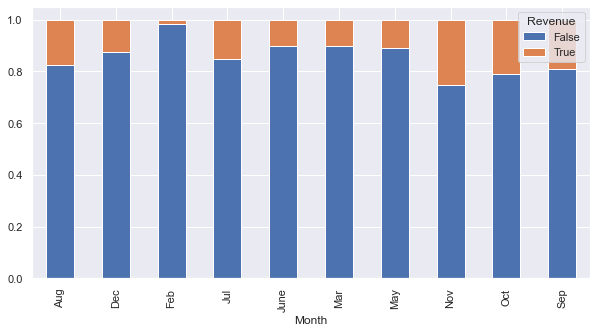

In [92]:
tmp = data[["Revenue", "Month"]]
tmp["count"] = 1
tmp = tmp.groupby(["Revenue", "Month"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Month==\""+row["Month"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Revenue", index="Month", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

<AxesSubplot:xlabel='quarter', ylabel='count'>

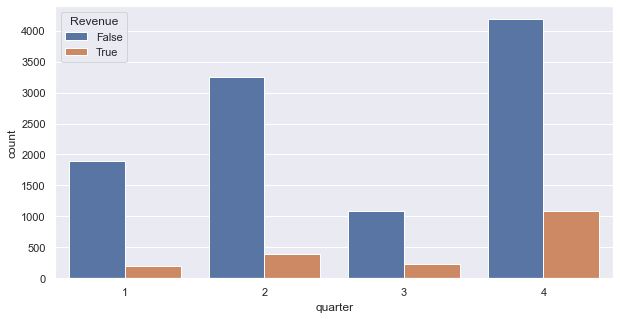

In [93]:
data["quarter"] = data["Month"].apply(lambda x: 1+np.floor(months.index(x)/3)).astype(int)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(data["quarter"], data=data, hue="Revenue")

##### Hypothesis testing for checking if there is any association between Revenue and Month

In [94]:
stat, p_val, dof = chi_sqred_ind_test(data, 'Month', 'Revenue', 0.05)

Contigency table: 
 Revenue  False  True
Month               
Aug        357    76
Dec       1511   216
Feb        181     3
Jul        366    66
June       259    29
Mar       1715   192
May       2999   365
Nov       2238   760
Oct        434   115
Sep        362    86
Statistic: 384.93476153599426
P-value: 2.2387855164805443e-77
DOF: 9
probability=0.950, critical=16.919, stat=384.935
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


Since Null Hypothesis is rejected, that means Month and Revenue are not Independent,

### OperatingSystems
Task is to check do OperatingSystems play role in revenue generation 

In [95]:
# checking the no. of Os's is having
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [96]:
# Printing percentage of value counts 

print(data["OperatingSystems"].value_counts()/data.shape[0]*100)

2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


Text(0, 0.5, 'Count')

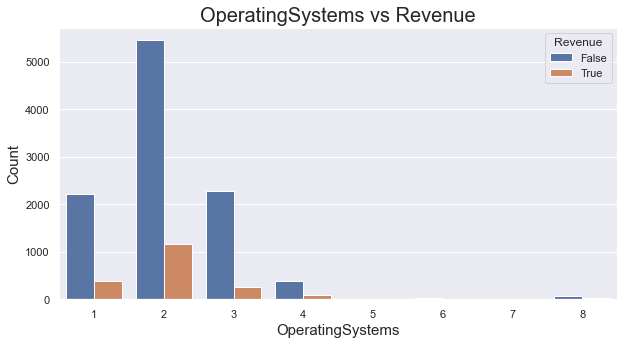

In [97]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["OperatingSystems"], data=data, hue="Revenue")
plt.title("OperatingSystems vs Revenue", fontsize=20)
plt.xlabel("OperatingSystems", fontsize=15)
plt.ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

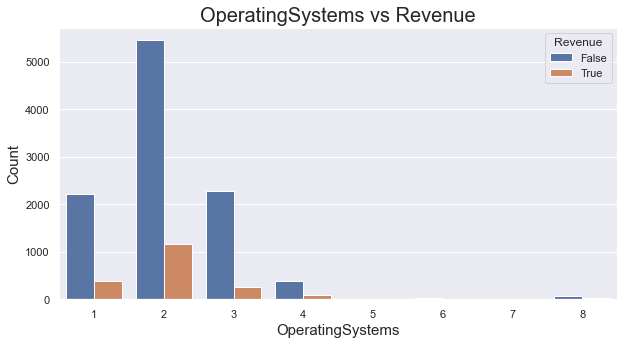

In [98]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["OperatingSystems"], data=data, hue="Revenue")
plt.title("OperatingSystems vs Revenue", fontsize=20)
plt.xlabel("OperatingSystems", fontsize=15)
plt.ylabel("Count", fontsize=15)

##### Hypothesis testing for checking if there is any association between Revenue and OperatingSystems

In [99]:
stat, p_val, dof = chi_sqred_ind_test(data, 'OperatingSystems', 'Revenue', 0.05)

Contigency table: 
 Revenue           False  True
OperatingSystems             
1                  2206   379
2                  5446  1155
3                  2287   268
4                   393    85
5                     5     1
6                    17     2
7                     6     1
8                    62    17
Statistic: 75.02705620298462
P-value: 1.4160941129614401e-13
DOF: 7
probability=0.950, critical=14.067, stat=75.027
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


There is a very strong skew to the right, with Operating Systems 5,6,7 and 8 having less than 1% of prevalence.

We can club operating systems 4 through 8 into a new category.

In [100]:
data["OperatingSystems_agg"] = data["OperatingSystems"].apply(lambda x: "other" 
                                                                    if x >=4 else x)
print(100*data["OperatingSystems_agg"].value_counts()/data.shape[0])

2        53.536091
1        20.965126
3        20.721817
other     4.776967
Name: OperatingSystems_agg, dtype: float64


In [101]:
data["OperatingSystems_agg"].value_counts()

2        6601
1        2585
3        2555
other     589
Name: OperatingSystems_agg, dtype: int64

Now let's visualize contributions again

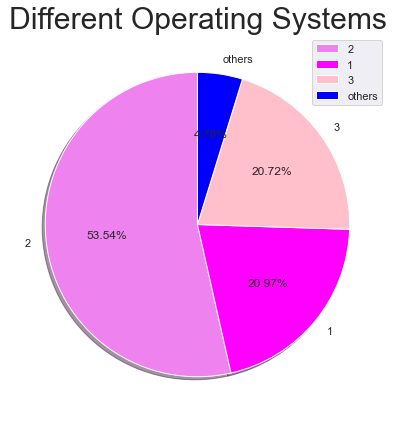

In [102]:
# plotting a pie chart for Operating Systems

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

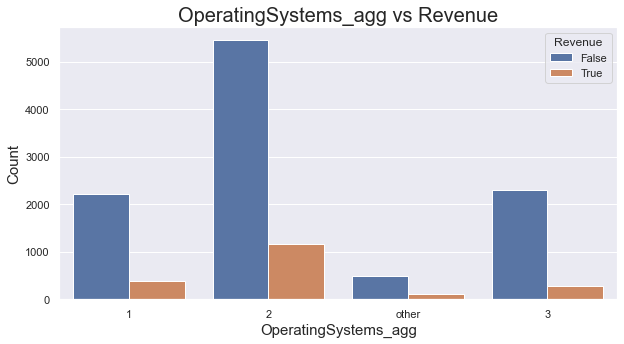

In [103]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["OperatingSystems_agg"], data=data, hue="Revenue")
plt.title("OperatingSystems_agg vs Revenue", fontsize=20)
plt.xlabel("OperatingSystems_agg", fontsize=15)
plt.ylabel("Count", fontsize=15)

##### Hypothesis testing for checking if there is any association between Revenue and OperatingSystems_agg

In [104]:
stat, p_val, dof = chi_sqred_ind_test(data, 'OperatingSystems_agg', 'Revenue', 0.05)

Contigency table: 
 Revenue               False  True
OperatingSystems_agg             
1                      2206   379
2                      5446  1155
3                      2287   268
other                   483   106
Statistic: 73.36847606018016
P-value: 8.104672963018227e-16
DOF: 3
probability=0.950, critical=7.815, stat=73.368
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


Since the null hypothesis is rejected, OperatingSystems_agg and Revenue are not independent.

##### Observation
* Top 3 Operating Systems are covered 95% of this dataset. So we should focus on them to increase our business.

### Browser
Task is to check What is the distribution of browsers in the dataset?

In [105]:
# checking the no. of Os's is having
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [106]:
# Browser percentage distribution

pd.DataFrame(100*data["Browser"].value_counts()/data.shape[0]).sort_index()

Browser
1   19.967559
2   64.566099
3    0.851582
4    5.969181
5    3.787510
6    1.411192
7    0.397405
8    1.094891
9    0.008110
10   1.321979
11   0.048662
12   0.081103
13   0.494728

Text(0, 0.5, 'Count')

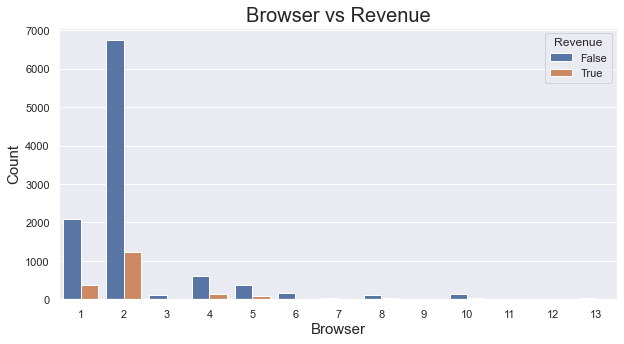

In [107]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["Browser"], data=data, hue="Revenue")
plt.title("Browser vs Revenue", fontsize=20)
plt.xlabel("Browser", fontsize=15)
plt.ylabel("Count", fontsize=15)

###### Hypothesis testing for checking if there is any association between Revenue and Browser

In [108]:
stat, p_val, dof = chi_sqred_ind_test(data, 'Browser', 'Revenue', 0.05)

Contigency table: 
 Revenue  False  True
Browser             
1         2097   365
2         6738  1223
3          100     5
4          606   130
5          381    86
6          154    20
7           43     6
8          114    21
9            1     0
10         131    32
11           5     1
12           7     3
13          45    16
Statistic: 27.71529940138156
P-value: 0.006087543179551089
DOF: 12
probability=0.950, critical=21.026, stat=27.715
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


Similar to Operating Systems, we can aggregate some of the less prevalent ones together.

In [109]:
data["Browser_agg"] = data["Browser"].apply(lambda x: "other" if x not in [1,2,4] else x)
display(pd.DataFrame(100*data["Browser_agg"].value_counts()/data.shape[0]))

Browser_agg
2        64.566099
1        19.967559
other     9.497161
4         5.969181

In [110]:
data["Browser_agg"].value_counts()

2        7961
1        2462
other    1171
4         736
Name: Browser_agg, dtype: int64

Now let's visualize contributions again

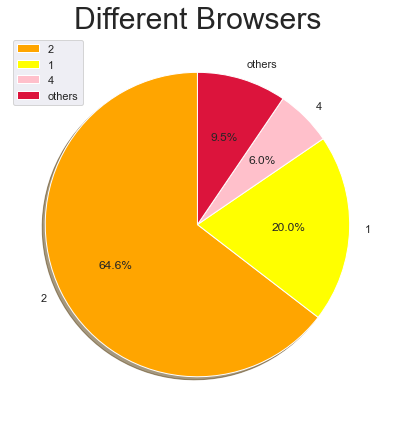

In [111]:
# Ploting a pie chart for operating systems
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 1171]
colors = ['orange', 'yellow', 'pink', 'crimson']
labels = "2", "1", "4", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', 
        startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

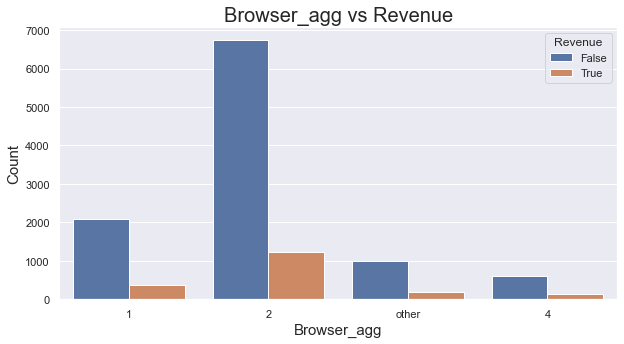

In [112]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["Browser_agg"], data=data, hue="Revenue")
plt.title("Browser_agg vs Revenue", fontsize=20)
plt.xlabel("Browser_agg", fontsize=15)
plt.ylabel("Count", fontsize=15)

Revenue Browser_agg  count  count_norm
0    False           1   2097    0.851747
1    False           2   6738    0.846376
2    False           4    606    0.823370
3    False       other    981    0.837746
4     True           1    365    0.148253
5     True           2   1223    0.153624
6     True           4    130    0.176630
7     True       other    190    0.162254

<AxesSubplot:xlabel='Browser_agg'>

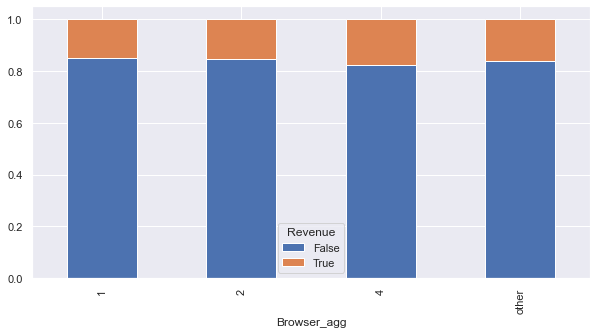

In [113]:
tmp = data[["Revenue", "Browser_agg"]]
tmp["Browser_agg"] = tmp["Browser_agg"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["Revenue", "Browser_agg"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Browser_agg==\""+row["Browser_agg"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Revenue", index="Browser_agg", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(10,5))

##### Hypothesis testing for checking if there is any association between Revenue and Browser_agg

In [114]:
stat, p_val, dof = chi_sqred_ind_test(data, 'Browser_agg', 'Revenue', 0.05)

Contigency table: 
 Revenue      False  True
Browser_agg             
1             2097   365
2             6738  1223
4              606   130
other          981   190
Statistic: 4.069718849248566
P-value: 0.25403350010984566
DOF: 3
probability=0.950, critical=7.815, stat=4.070
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


The test states that the Browser_agg and Revenue are independent of each other

##### Observation
*90% users used only top 3 browser. so we, have to focus on those Browsers.

#### Do Browser and Operating system have a strong association as well?

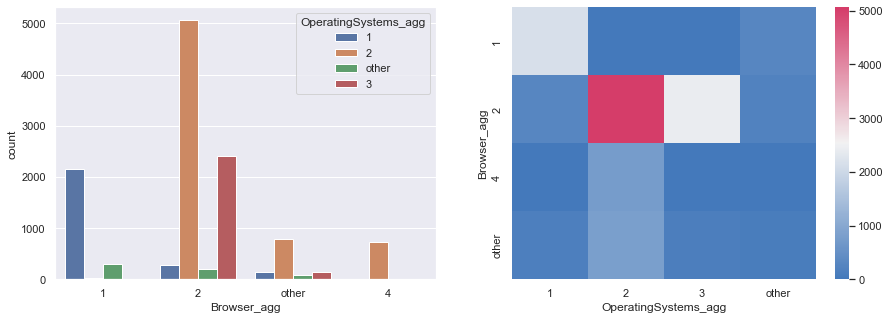

In [115]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
g = sns.countplot(x=data["Browser_agg"], data=data, hue="OperatingSystems_agg", 
                  ax=ax[0])
cutsomcmap = sns.diverging_palette(250, 0, as_cmap=True)
heat_map = sns.heatmap(pd.crosstab(data["Browser_agg"], data["OperatingSystems_agg"]),
                       cmap=cutsomcmap, ax=ax[1])

In [116]:
# Hypothesis testing

stat, p_val, dof = chi_sqred_ind_test(data, 'Browser_agg', 'OperatingSystems_agg', 0.05)

Contigency table: 
 OperatingSystems_agg     1     2     3  other
Browser_agg                                  
1                     2153    16     1    292
2                      280  5059  2416    206
4                        3   732     0      1
other                  149   794   138     90
Statistic: 9756.938920780889
P-value: 0.0
DOF: 9
probability=0.950, critical=16.919, stat=9756.939
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


The Browser and Operating system are not independent.

### SpecialDay (probability)
This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

In [117]:
data['SpecialDay (probability)'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay (probability), dtype: int64

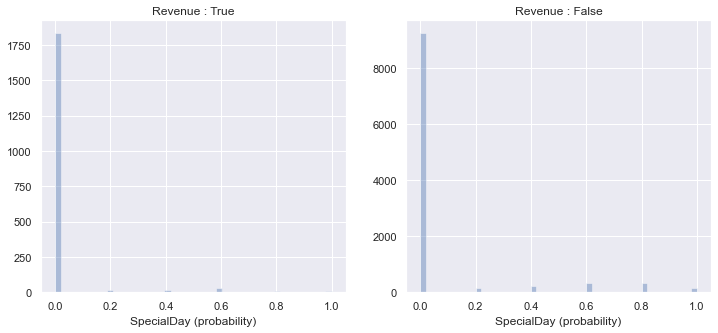

In [118]:
#  distribution of SpecialDay (probability)  column

f, ax = plt.subplots(1,2,figsize=(12,5))
g = sns.distplot(a=data.query("Revenue==True")["SpecialDay (probability)"], ax=ax[0], 
                 kde=False)
y = g.set(title="Revenue : True")
g = sns.distplot(a=data.query("Revenue==False")["SpecialDay (probability)"], ax=ax[1],
                 kde=False)
y = g.set(title="Revenue : False")

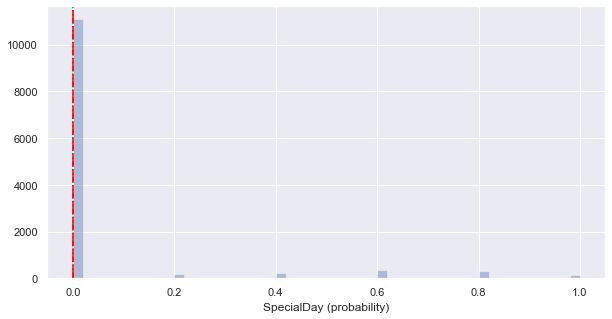

In [119]:
# Distribution of SpecialDay (probability)

fig, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.distplot(data["SpecialDay (probability)"], ax=ax, kde=False)
l = g.axvline(x=np.percentile(data["SpecialDay (probability)"], 50), linestyle="--", color="red")
l = g.axvline(x=np.percentile(data["SpecialDay (probability)"], 75), linestyle="-.", color="red")

Text(0, 0.5, 'Count')

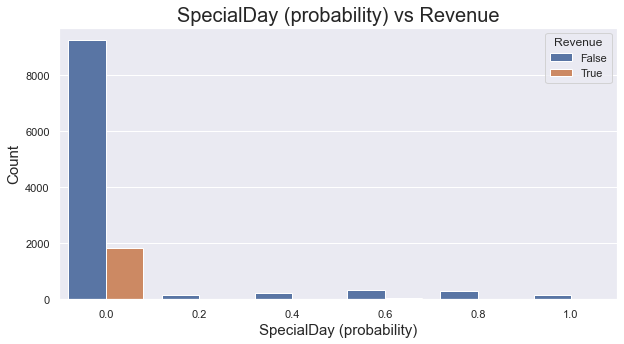

In [120]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["SpecialDay (probability)"], data=data, hue="Revenue")
plt.title("SpecialDay (probability) vs Revenue", fontsize=20)
plt.xlabel("SpecialDay (probability)", fontsize=15)
plt.ylabel("Count", fontsize=15)

In [121]:
# Hypothesis testing

stat, p_val, dof = chi_sqred_ind_test(data, 'SpecialDay (probability)', 'Revenue', 0.05)

Contigency table: 
 Revenue                   False  True
SpecialDay (probability)             
0.0                        9248  1831
0.2                         164    14
0.4                         230    13
0.6                         322    29
0.8                         314    11
1.0                         144    10
Statistic: 96.07690626757704
P-value: 3.543244340384199e-19
DOF: 5
probability=0.950, critical=11.070, stat=96.077
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


### Region

In [122]:
print((100*data["Region"].value_counts()/data.shape[0]).sort_index())

1    38.767234
2     9.213301
3    19.489051
4     9.586375
5     2.579075
6     6.528792
7     6.171938
8     3.519870
9     4.144363
Name: Region, dtype: float64


Text(0, 0.5, 'Count')

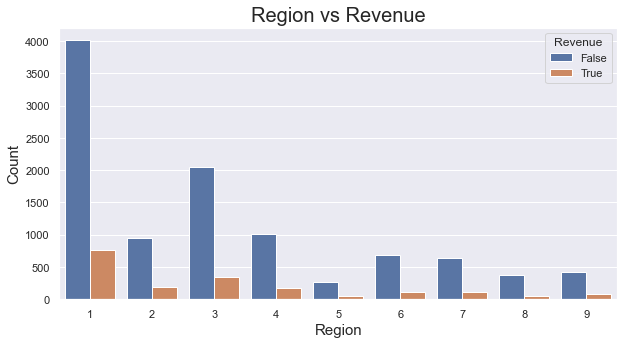

In [123]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["Region"], data=data, hue="Revenue")
plt.title("Region vs Revenue", fontsize=20)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Count", fontsize=15)

Revenue Region  count  count_norm
0     False      1   4009    0.838703
1     False      2    948    0.834507
2     False      3   2054    0.854765
3     False      4   1007    0.851946
4     False      5    266    0.836478
5     False      6    693    0.860870
6     False      7    642    0.843627
7     False      8    378    0.870968
8     False      9    425    0.831703
9      True      1    771    0.161297
10     True      2    188    0.165493
11     True      3    349    0.145235
12     True      4    175    0.148054
13     True      5     52    0.163522
14     True      6    112    0.139130
15     True      7    119    0.156373
16     True      8     56    0.129032
17     True      9     86    0.168297

<AxesSubplot:xlabel='Region'>

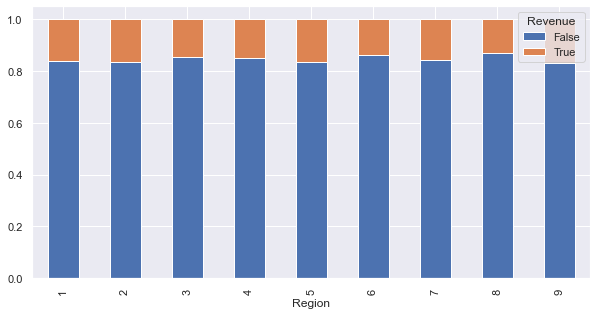

In [124]:
tmp = data[["Revenue", "Region"]]
tmp["Region"] = tmp["Region"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["Revenue", "Region"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Region==\""+row["Region"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Revenue", index="Region", values="count_norm").plot.bar(stacked=True,
                                                                           figsize=(10,5))

##### Hypothesis testing for checking if there is any association between Revenue and Region

In [125]:
stat, p_val, dof = chi_sqred_ind_test(data, 'Region', 'Revenue', 0.05)

Contigency table: 
 Revenue  False  True
Region              
1         4009   771
2          948   188
3         2054   349
4         1007   175
5          266    52
6          693   112
7          642   119
8          378    56
9          425    86
Statistic: 9.252751430579844
P-value: 0.3214249979076556
DOF: 8
probability=0.950, critical=15.507, stat=9.253
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


The Chi square test fails to reject the null hypothesis, stating that Region is independent of Revenue.

### TrafficType

In [126]:
# Percentage distribution of TrafficType

pd.DataFrame((100*data["TrafficType"].value_counts()/data.shape[0]).sort_index())

TrafficType
1     19.878345
2     31.735604
3     16.642336
4      8.669911
5      2.108678
6      3.600973
7      0.324412
8      2.781833
9      0.340633
10     3.649635
11     2.003244
12     0.008110
13     5.985401
14     0.105434
15     0.308191
16     0.024331
17     0.008110
18     0.081103
19     0.137875
20     1.605839

Let's aggregate all the Traffic Types that contribute less than 2% together.

In [127]:
traffic_type_pct = 100*data["TrafficType"].value_counts().to_frame()/data.shape[0]
idx_list = traffic_type_pct[traffic_type_pct["TrafficType"] < 2].index
data["TrafficType_agg"] = data["TrafficType"].apply(lambda x: "other" 
                                                                if x in idx_list else x)
100*data["TrafficType_agg"].value_counts().to_frame()/data.shape[0]

TrafficType_agg
2            31.735604
1            19.878345
3            16.642336
4             8.669911
13            5.985401
10            3.649635
6             3.600973
other         2.944039
8             2.781833
5             2.108678
11            2.003244

Now visualize again.

Text(0, 0.5, 'Count')

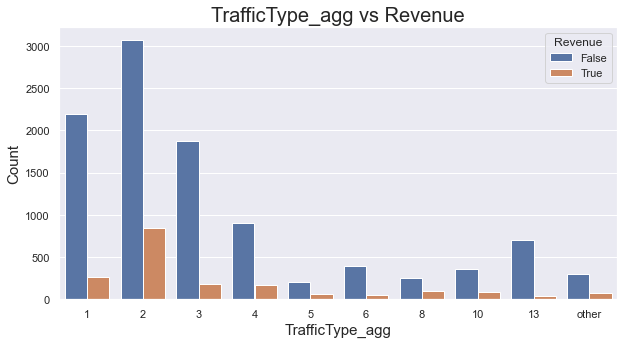

In [128]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["TrafficType_agg"], data=data, hue="Revenue",  
              order=[1,2,3,4,5,6,8,10,13,'other'])
plt.title("TrafficType_agg vs Revenue", fontsize=20)
plt.xlabel("TrafficType_agg", fontsize=15)
plt.ylabel("Count", fontsize=15)

In [129]:
# Hypothesis testing

stat, p_val, dof = chi_sqred_ind_test(data, 'TrafficType_agg', 'Revenue', 0.05)

Contigency table: 
 Revenue          False  True
TrafficType_agg             
1                 2189   262
2                 3066   847
3                 1872   180
4                  904   165
5                  204    56
6                  391    53
8                  248    95
10                 360    90
11                 200    47
13                 695    43
other              293    70
Statistic: 344.0287399058963
P-value: 7.3673872604969095e-68
DOF: 10
probability=0.950, critical=18.307, stat=344.029
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


The Chi square test rejects the null hypothesis, stating that TrafficType_agg has an association with Revenue.

### VisitorType

In [130]:
# Percentage distribution of VisitorType column data

print(100*data["VisitorType"].value_counts()/data.shape[0])

Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


Text(0, 0.5, 'Count')

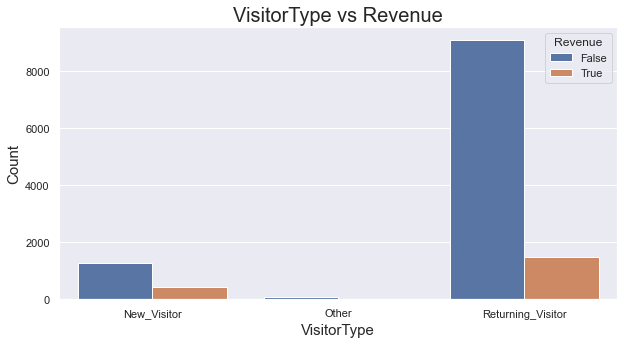

In [131]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x=data["VisitorType"], data=data, hue="Revenue")
plt.title("VisitorType vs Revenue", fontsize=20)
plt.xlabel("VisitorType", fontsize=15)
plt.ylabel("Count", fontsize=15)

<AxesSubplot:xlabel='VisitorType'>

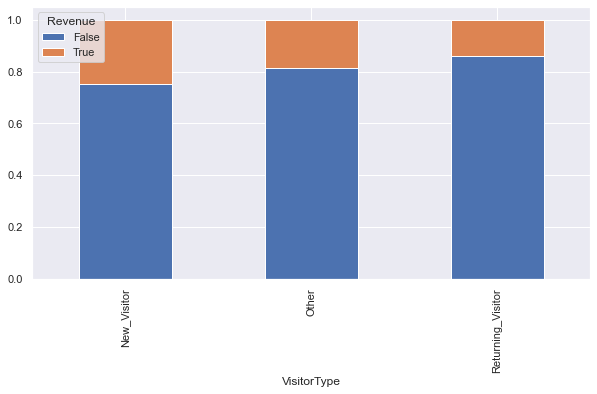

In [132]:
tmp = data[["Revenue", "VisitorType"]]
tmp["VisitorType"] = tmp["VisitorType"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["Revenue", "VisitorType"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "VisitorType==\""+row["VisitorType"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
tmp.pivot(columns="Revenue", index="VisitorType", values="count_norm").plot.bar(stacked=True, 
                                                                                figsize=(10,5))

In [133]:
# Hypothesis testing

stat, p_val, dof = chi_sqred_ind_test(data, 'VisitorType', 'Revenue', 0.05)

Contigency table: 
 Revenue            False  True
VisitorType                   
New_Visitor         1272   422
Other                 69    16
Returning_Visitor   9081  1470
Statistic: 135.2519228192047
P-value: 4.269904152293866e-30
DOF: 2
probability=0.950, critical=5.991, stat=135.252
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


From Hypothesis we conclude Visitor type and Revenue have a strong association with each other.

###  Weekend

In [134]:
# Checking unique values and their count in Weekend column

data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [135]:
# Checking Percentage of each class in Weekend

data['Weekend'].value_counts()/data.shape[0]*100

False    76.739659
True     23.260341
Name: Weekend, dtype: float64

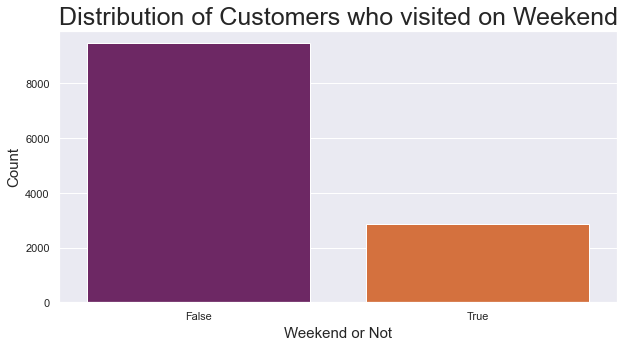

In [136]:
# Checking the Distribution of customers on Weekend

plt.figure(figsize=(10,5))
sns.countplot(x=data['Weekend'], palette = 'inferno')
plt.title("Distribution of Customers who visited on Weekend", fontsize=25)
plt.xlabel("Weekend or Not", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

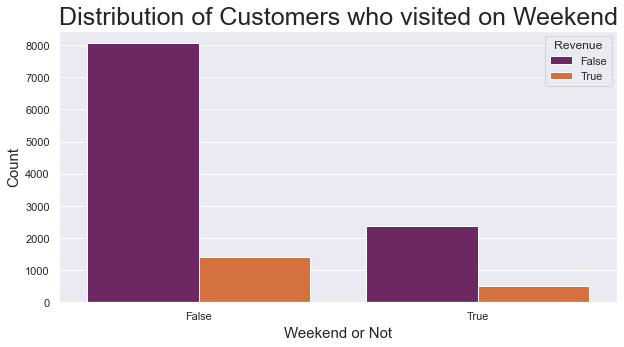

In [137]:
# Checking the Distribution of customers on Weekend

f, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x="Weekend", data=data, hue="Revenue", palette='inferno')
plt.title("Distribution of Customers who visited on Weekend", fontsize=25)
plt.xlabel("Weekend or Not", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [138]:
# Hypothesis testing

stat, p_val, dof = chi_sqred_ind_test(data, 'Weekend', 'Revenue', 0.05)

Contigency table: 
 Revenue  False  True
Weekend             
False     8053  1409
True      2369   499
Statistic: 10.390978319534856
P-value: 0.0012663251061221968
DOF: 1
probability=0.950, critical=3.841, stat=10.391
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


A weekend may also be a strong predictor of Revenue generation for a session.


####  Revenue

In [139]:
# Checking unique values and their count in Revenue column

data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [140]:
# Checking Percentage of each class

data['Revenue'].value_counts()/data.shape[0]*100

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

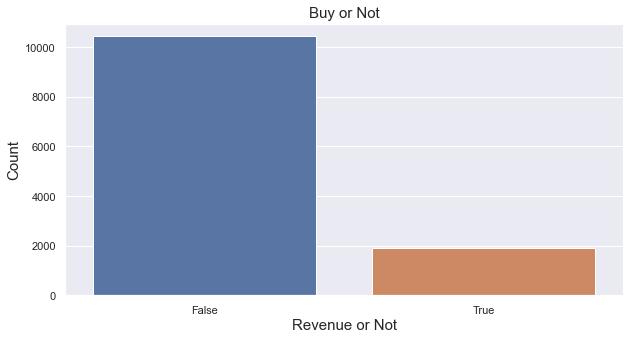

In [141]:
# Checking the Distribution of customers on Revenue

plt.figure(figsize=(10,5))
sns.countplot(x=data['Revenue'])
plt.title("Buy or Not", fontsize=15)
plt.xlabel("Revenue or Not", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

##### Observation on Revenue column

From the above information we see that the distribution of Revenue data are highly inbalanced.

In [142]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates in %', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue',
       'Allpagecount', 'Allpagecount_Duration', 'BounceRates_x_PageValues',
       'quarter', 'OperatingSystems_agg', 'Browser_agg', 'TrafficType_agg'],
      dtype='object')

Let's make a dataframe with the categorical features alongside their Chisq statistic and p-values for summary

In [143]:
chisq_dict = {"column":[], 
             "chisq_stat":[],
             "pval":[]

             }
for c in cat_cols+["quarter", "Browser_agg", "TrafficType_agg", "OperatingSystems_agg"]:
    print(c, end=" --> ")
    stat, p, dof = chi_sqred_ind_test(data, c, "Revenue", debug=False, print_result=False)
    chisq_dict["column"].append(c)
    chisq_dict["chisq_stat"].append(stat)
    chisq_dict["pval"].append(np.round(p, 4))
    

def highlight_weakpred(x):
    return ['background-color: salmon' if x["pval"] > 0.05
            else ''
            for i in x]

pd.DataFrame(chisq_dict).style.apply(highlight_weakpred, axis=1)

Allpagecount --> Administrative --> Informational --> ProductRelated --> Month --> OperatingSystems --> SpecialDay (probability) --> Browser --> Region --> TrafficType --> VisitorType --> Weekend --> quarter --> Browser_agg --> TrafficType_agg --> OperatingSystems_agg --> 

In [144]:
# check wheather Revenue is influenced by categorical column
# Null Hypopthesis, H0 = proportion of revenue accross the category is same
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in cat_cols+["quarter", "Browser_agg", "TrafficType_agg", "OperatingSystems_agg"]:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(data[n], data['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant
        
        
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

Feature  P-Value Significance
0               Allpagecount   0.0000            *
1             Administrative   0.0000            *
2              Informational   0.0000            *
3             ProductRelated   0.0000            *
4                      Month   0.0000            *
5           OperatingSystems   0.0000            *
6   SpecialDay (probability)   0.0000            *
7                    Browser   0.0061            *
8                     Region   0.3214           **
9                TrafficType   0.0000            *
10               VisitorType   0.0000            *
11                   Weekend   0.0013            *
12                   quarter   0.0000            *
13               Browser_agg   0.2540           **
14           TrafficType_agg   0.0000            *
15      OperatingSystems_agg   0.0000            *

### Feature Engineering and feature selection

In [42]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
0              0.20            0.20         0.0                       0.0   
1              0.00            0.10         0.0                       0.0   
2              0.20            0.20         0.0                       0.0   
3              0.05            0.14         0.0                       0.0   
4              0.02            0.05         0.0                       0.0   

  Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  \
0   Feb                 1        1       1            1  Returning_Visitor   
1   Feb                 2        2       1            2  Returning_Visitor   
2   Feb                 4        1       9            3  Returning_Visitor   
3   Feb                 3        2       2            4  Returning_Visitor   
4   Feb                 3        3       1            4  Returning_Visitor   

   Weekend  Revenue  Allpagecount  Allpagecount_Duration  \
0    False    False             1               0.000000   
1    False    False             2              64.000000   
2    False    False             1               0.000000   
3    False    False             2               2.666667   
4     True    False            10             627.500000   

   BounceRates_x_PageValues  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0

In [70]:
# 

ycol = ["Revenue"]

numerical_cols = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration",
                  "Allpagecount_Duration", "BounceRates in %", "ExitRates in %", "PageValues", 
                 "BounceRates_x_PageValues"]

cat_cols = [c for c in data.columns if c not in numerical_cols+ycol]
data_styled = data.copy()

display(
    data_styled[numerical_cols+ycol].head(),
    data_styled[cat_cols+ycol].head()
)

Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                64.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 2.666667   
4                      0.0                     0.0               627.500000   

   Allpagecount_Duration  BounceRates in %  ExitRates in %  PageValues  \
0               0.000000              0.20            0.20         0.0   
1              64.000000              0.00            0.10         0.0   
2               0.000000              0.20            0.20         0.0   
3               2.666667              0.05            0.14         0.0   
4             627.500000              0.02            0.05         0.0   

   BounceRates_x_PageValues  Revenue  
0                       0.0    False  
1                       0.0    False  
2                       0.0    False  
3                       0.0    False  
4                       0.0    False

Administrative  Informational  ProductRelated  SpecialDay (probability)  \
0               0              0               1                       0.0   
1               0              0               2                       0.0   
2               0              0               1                       0.0   
3               0              0               2                       0.0   
4               0              0              10                       0.0   

  Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  \
0   Feb                 1        1       1            1  Returning_Visitor   
1   Feb                 2        2       1            2  Returning_Visitor   
2   Feb                 4        1       9            3  Returning_Visitor   
3   Feb                 3        2       2            4  Returning_Visitor   
4   Feb                 3        3       1            4  Returning_Visitor   

   Weekend  Allpagecount  Revenue  
0    False             1    False  
1    False             2    False  
2    False             1    False  
3    False             2    False  
4     True            10    False

#### Feature Engineering on  Categorical  columns
Let's analyse how the Categorical  columns interact with each other.

We need to remove the redundant categorical variables.

In [71]:
data[cat_cols].head()

Administrative  Informational  ProductRelated  SpecialDay (probability)  \
0               0              0               1                       0.0   
1               0              0               2                       0.0   
2               0              0               1                       0.0   
3               0              0               2                       0.0   
4               0              0              10                       0.0   

  Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  \
0   Feb                 1        1       1            1  Returning_Visitor   
1   Feb                 2        2       1            2  Returning_Visitor   
2   Feb                 4        1       9            3  Returning_Visitor   
3   Feb                 3        2       2            4  Returning_Visitor   
4   Feb                 3        3       1            4  Returning_Visitor   

   Weekend  Allpagecount  
0    False             1  
1    False             2  
2    False             1  
3    False             2  
4     True            10

We also established that  Browser, Browser_agg and Region have no effect on the Revenue variable (based on ChiSq. tests).

Also dropping unneccessary columns like OperatingSystems, TrafficType.

In [72]:
drop_cols = ["OperatingSystems", "Browser", "Browser_agg", "Region", "TrafficType"]

for i in drop_cols:
    if i in data.columns:
        data.drop(i, inplace=True, axis=1)

In [73]:
cat_cols = [c for c in cat_cols if c not in drop_cols]
data[cat_cols].head()

Administrative  Informational  ProductRelated  SpecialDay (probability)  \
0               0              0               1                       0.0   
1               0              0               2                       0.0   
2               0              0               1                       0.0   
3               0              0               2                       0.0   
4               0              0              10                       0.0   

  Month        VisitorType  Weekend  Allpagecount  
0   Feb  Returning_Visitor    False             1  
1   Feb  Returning_Visitor    False             2  
2   Feb  Returning_Visitor    False             1  
3   Feb  Returning_Visitor    False             2  
4   Feb  Returning_Visitor     True            10

#### Feature Engineering on  Numerical columns
Let's analyse how the numerical columns interact with each other.

##### Removing correlated columns

In [74]:
# calculate correlation matrix

corr_matrix = data[numerical_cols].corr().abs()

# print correlation matrix

pd.DataFrame(corr_matrix)

Administrative_Duration  Informational_Duration  \
Administrative_Duration                  1.000000                0.238031   
Informational_Duration                   0.238031                1.000000   
ProductRelated_Duration                  0.355422                0.347364   
Allpagecount_Duration                    0.436962                0.415922   
BounceRates in %                         0.144170                0.074067   
ExitRates in %                           0.205798                0.105276   
PageValues                               0.067608                0.030861   
BounceRates_x_PageValues                 0.033683                0.035722   

                          ProductRelated_Duration  Allpagecount_Duration  \
Administrative_Duration                  0.355422               0.436962   
Informational_Duration                   0.347364               0.415922   
ProductRelated_Duration                  1.000000               0.993910   
Allpagecount_Duration                    0.993910               1.000000   
BounceRates in %                         0.184541               0.190922   
ExitRates in %                           0.251984               0.261759   
PageValues                               0.052823               0.057602   
BounceRates_x_PageValues                 0.030715               0.034234   

                          BounceRates in %  ExitRates in %  PageValues  \
Administrative_Duration           0.144170        0.205798    0.067608   
Informational_Duration            0.074067        0.105276    0.030861   
ProductRelated_Duration           0.184541        0.251984    0.052823   
Allpagecount_Duration             0.190922        0.261759    0.057602   
BounceRates in %                  1.000000        0.913004    0.119386   
ExitRates in %                    0.913004        1.000000    0.174498   
PageValues                        0.119386        0.174498    1.000000   
BounceRates_x_PageValues          0.007481        0.034403    0.333661   

                          BounceRates_x_PageValues  
Administrative_Duration                   0.033683  
Informational_Duration                    0.035722  
ProductRelated_Duration                   0.030715  
Allpagecount_Duration                     0.034234  
BounceRates in %                          0.007481  
ExitRates in %                            0.034403  
PageValues                                0.333661  
BounceRates_x_PageValues                  1.000000

<AxesSubplot:>

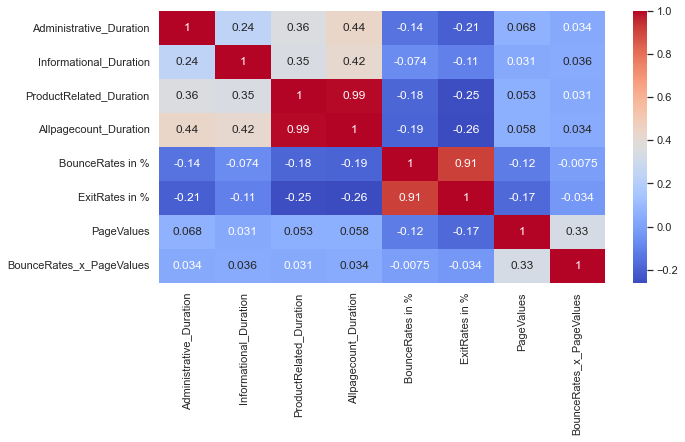

In [151]:
# Heat Map on Numerical columns

plt.figure(figsize=(10,5))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")

* From the above Heatmap we, have to drop one of between ExitRates in % and BounceRates in %
* Administrative_Duration, Informational_Duration, ProductRelated_Duration are added to represent as Allpagecount_Duration as they individually doesn't provide any specific reason for Revenue generation.

<Axes: >

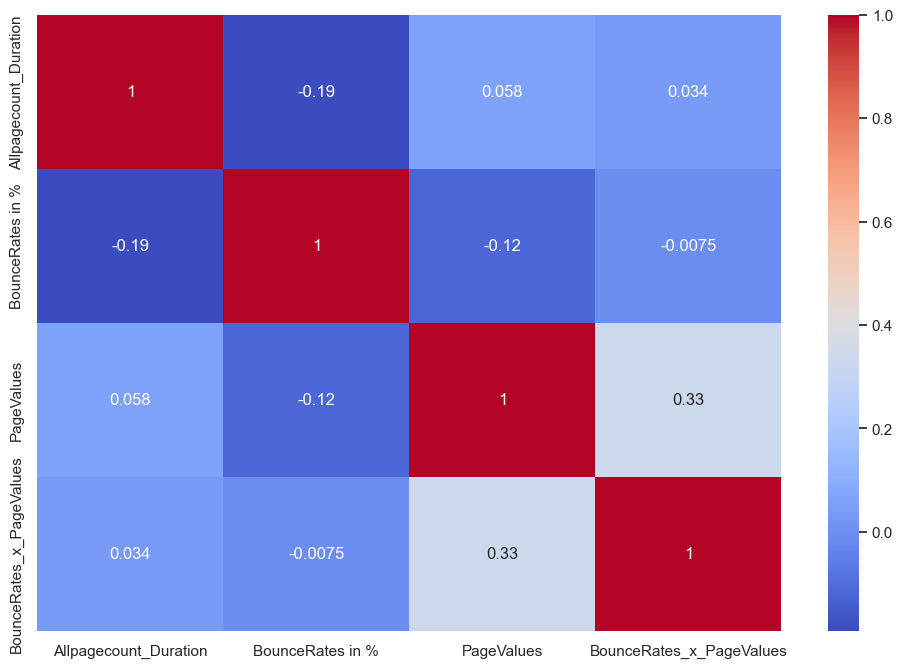

In [14]:
drop_cols = ["Administrative_Duration","Informational_Duration","ProductRelated_Duration", 
             "Allpagecount_Duration", "ExitRates in %"]
numerical_cols = [  "Allpagecount_Duration",
                  "BounceRates in %", 
                  "PageValues", 
                  "BounceRates_x_PageValues"]

plt.figure(figsize=(12,8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")

In [75]:
for i in drop_cols:
    if i in data.columns:
        data.drop(i, axis=1, inplace=True)


In [76]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
0              0.20            0.20         0.0                       0.0   
1              0.00            0.10         0.0                       0.0   
2              0.20            0.20         0.0                       0.0   
3              0.05            0.14         0.0                       0.0   
4              0.02            0.05         0.0                       0.0   

  Month        VisitorType  Weekend  Revenue  Allpagecount  \
0   Feb  Returning_Visitor    False    False             1   
1   Feb  Returning_Visitor    False    False             2   
2   Feb  Returning_Visitor    False    False             1   
3   Feb  Returning_Visitor    False    False             2   
4   Feb  Returning_Visitor     True    False            10   

   Allpagecount_Duration  BounceRates_x_PageValues  
0               0.000000                       0.0  
1              64.000000                       0.0  
2               0.000000                       0.0  
3               2.666667                       0.0  
4             627.500000                       0.0

<AxesSubplot:>

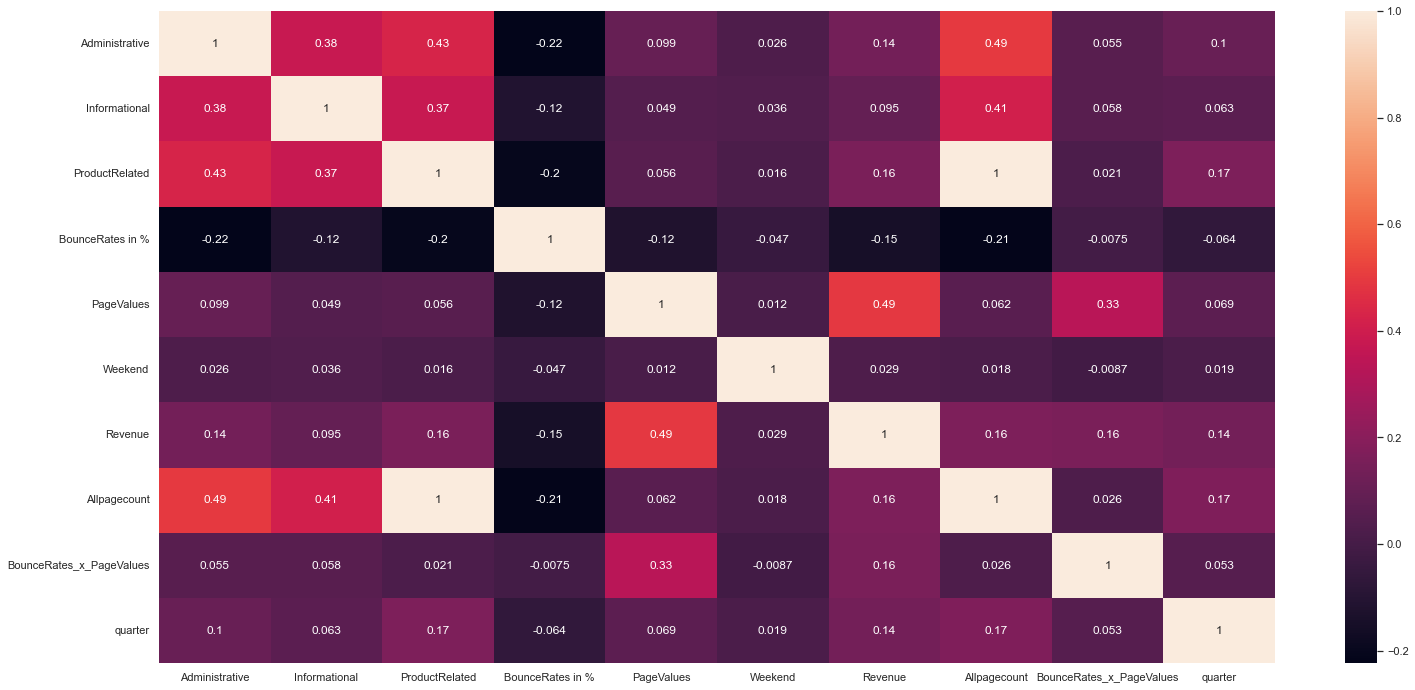

In [155]:
# correlation
plt.figure(figsize=(25,12))
sns.heatmap(data.corr(), annot=True)

### Checking for Duplicate records

In [50]:
dups = data.duplicated()
print(f"No. of Duplicate rows : {dups.sum()}")

# Printing Duplicate records
data[dups]

No. of Duplicate rows : 600


Administrative  Administrative_Duration  Informational  \
2                   0                      0.0              0   
16                  0                      0.0              0   
50                  0                      0.0              0   
56                  0                      0.0              0   
64                  0                      0.0              0   
67                  0                      0.0              0   
69                  0                      0.0              0   
70                  0                      0.0              0   
79                  0                      0.0              0   
85                  0                      0.0              0   
91                  0                      0.0              0   
125                 0                      0.0              0   
132                 0                      0.0              0   
140                 0                      0.0              0   
143                 0                      0.0              0   
151                 0                      0.0              0   
156                 0                      0.0              0   
158                 0                      0.0              0   
159                 0                      0.0              0   
173                 0                      0.0              0   
178                 0                      0.0              0   
181                 0                      0.0              0   
182                 0                      0.0              0   
252                 0                      0.0              0   
271                 0                      0.0              0   
286                 0                      0.0              0   
298                 0                      0.0              0   
302                 0                      0.0              0   
330                 0                      0.0              0   
341                 0                      0.0              0   
344                 0                      0.0              0   
359                 0                      0.0              0   
383                 0                      0.0              0   
398                 0                      0.0              0   
418                 0                      0.0              0   
421                 0                      0.0              0   
429                 0                      0.0              0   
456                 0                      0.0              0   
458                 0                      0.0              0   
468                 0                      0.0              0   
479                 0                      0.0              0   
483                 0                      0.0              0   
512                 0                      0.0              0   
515                 0                      0.0              0   
532                 0                      0.0              0   
540                 0                      0.0              0   
554                 0                      0.0              0   
577                 0                      0.0              0   
585                 0                      0.0              0   
589                 0                      0.0              0   
591                 0                      0.0              0   
638                 0                      0.0              0   
658                 0                      0.0              0   
659                 0                      0.0              0   
670                 0                      0.0              0   
720                 0                      0.0              0   
724                 0                      0.0              0   
727                 0                      0.0              0   
743                 0                      0.0              0   
763                 0                      0.0              0   
774                 0                     

In [157]:
data.shape

(12330, 15)

In [158]:
# Dropping duplicate records
data.drop_duplicates(inplace=True)

# checking shape of data after duplicate rows are dropped
data.shape

(11404, 15)

In [19]:
data.head()

Administrative  Informational  ProductRelated  BounceRates in %  \
0               0              0               1              0.20   
1               0              0               2              0.00   
2               0              0               1              0.20   
3               0              0               2              0.05   
4               0              0              10              0.02   

   PageValues  SpecialDay (probability) Month        VisitorType  Weekend  \
0         0.0                       0.0   Feb  Returning_Visitor    False   
1         0.0                       0.0   Feb  Returning_Visitor    False   
2         0.0                       0.0   Feb  Returning_Visitor    False   
3         0.0                       0.0   Feb  Returning_Visitor    False   
4         0.0                       0.0   Feb  Returning_Visitor     True   

   Revenue  Allpagecount  BounceRates_x_PageValues  
0    False             1                       0.0  
1    False             2                       0.0  
2    False             1                       0.0  
3    False             2                       0.0  
4    False            10                       0.0

# Dataset Pre-Processing

### Class Distribution

In [77]:
print(data["Revenue"].value_counts())
print(f"Visitors which doesn't generates revenue = {round(data["Revenue"].value_counts()[0]/data.shape[0]*100,3)}%")
print(f"Visitors which  generates revenue = {round(data["Revenue"].value_counts()[1]/data.shape[0]*100,3)}%")


Revenue
False    10422
True      1908
Name: count, dtype: int64
Visitors which doesn't generates revenue = 84.526%
Visitors which  generates revenue = 15.474%


### Data Type Correction

In [78]:
data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates in %            float64
ExitRates in %              float64
PageValues                  float64
SpecialDay (probability)    float64
Month                        object
VisitorType                  object
Weekend                        bool
Revenue                        bool
Allpagecount                  int64
Allpagecount_Duration       float64
BounceRates_x_PageValues    float64
dtype: object

In [79]:
data["Weekend"] = data["Weekend"].astype("category")


In [80]:
data.dtypes


Administrative                 int64
Administrative_Duration      float64
Informational                  int64
Informational_Duration       float64
ProductRelated                 int64
ProductRelated_Duration      float64
BounceRates in %             float64
ExitRates in %               float64
PageValues                   float64
SpecialDay (probability)     float64
Month                         object
VisitorType                   object
Weekend                     category
Revenue                         bool
Allpagecount                   int64
Allpagecount_Duration        float64
BounceRates_x_PageValues     float64
dtype: object

### Treating Duplicate Values

In [81]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the data : {data.duplicated().sum()}")
print("*"*100)
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups]

The total number of duplicated observations in the data : 600
****************************************************************************************************
No of duplicate rows = 600


Administrative  Administrative_Duration  Informational  \
2                   0                      0.0              0   
16                  0                      0.0              0   
50                  0                      0.0              0   
56                  0                      0.0              0   
64                  0                      0.0              0   
67                  0                      0.0              0   
69                  0                      0.0              0   
70                  0                      0.0              0   
79                  0                      0.0              0   
85                  0                      0.0              0   
91                  0                      0.0              0   
125                 0                      0.0              0   
132                 0                      0.0              0   
140                 0                      0.0              0   
143                 0                      0.0              0   
151                 0                      0.0              0   
156                 0                      0.0              0   
158                 0                      0.0              0   
159                 0                      0.0              0   
173                 0                      0.0              0   
178                 0                      0.0              0   
181                 0                      0.0              0   
182                 0                      0.0              0   
252                 0                      0.0              0   
271                 0                      0.0              0   
286                 0                      0.0              0   
298                 0                      0.0              0   
302                 0                      0.0              0   
330                 0                      0.0              0   
341                 0                      0.0              0   
344                 0                      0.0              0   
359                 0                      0.0              0   
383                 0                      0.0              0   
398                 0                      0.0              0   
418                 0                      0.0              0   
421                 0                      0.0              0   
429                 0                      0.0              0   
456                 0                      0.0              0   
458                 0                      0.0              0   
468                 0                      0.0              0   
479                 0                      0.0              0   
483                 0                      0.0              0   
512                 0                      0.0              0   
515                 0                      0.0              0   
532                 0                      0.0              0   
540                 0                      0.0              0   
554                 0                      0.0              0   
577                 0                      0.0              0   
585                 0                      0.0              0   
589                 0                      0.0              0   
591                 0                      0.0              0   
638                 0                      0.0              0   
658                 0                      0.0              0   
659                 0                      0.0              0   
670                 0                      0.0              0   
720                 0                      0.0              0   
724                 0                      0.0              0   
727                 0                      0.0              0   
743                 0                      0.0              0   
763                 0                      0.0              0   
774                 0                     

In [82]:
data.drop_duplicates(inplace=True)
print(f"The total number of duplicated observations in the data : {data.duplicated().sum()}")
print(data.shape)

The total number of duplicated observations in the data : 0
(11730, 17)


In [83]:
# Label encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

Revenue
0    9822
1    1908
Name: count, dtype: int64

### Splitting the data into Dependent and Independent variable


In [84]:
x = data.drop(["Revenue"], axis=1)
y = data["Revenue"]

In [85]:
print(x.shape)
print("*********************************")
print(y.shape)

(11730, 16)
*********************************
(11730,)


In [86]:
y.head()


0    0
1    0
3    0
4    0
5    0
Name: Revenue, dtype: int64

In [87]:
y.value_counts()

Revenue
0    9822
1    1908
Name: count, dtype: int64

### Split the data into training and test


In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=101)

### Checking missing values

In [89]:
print(x_train.isnull().sum())
print(f"Total number of null values in the dataset : {x_train.isnull().sum().sum()}")

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
Month                       0
VisitorType                 0
Weekend                     0
Allpagecount                0
Allpagecount_Duration       0
BounceRates_x_PageValues    0
dtype: int64
Total number of null values in the dataset : 0


In [90]:
print(x_test.isnull().sum())
print(f"Total number of null values in the dataset : {x_test.isnull().sum().sum()}")

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
Month                       0
VisitorType                 0
Weekend                     0
Allpagecount                0
Allpagecount_Duration       0
BounceRates_x_PageValues    0
dtype: int64
Total number of null values in the dataset : 0


 Here we can see that there are no null values in the dataset. We do not need to fix or replace 
any null values in the dataset.

In [91]:
x_train.head()

Administrative  Administrative_Duration  Informational  \
2752                5               138.500000              0   
10716               0                 0.000000              0   
10651               2                27.500000              0   
10361               5               139.983333              0   
4539                4                36.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
2752                      0.0              11               578.333333   
10716                     0.0               3                79.000000   
10651                     0.0              44              1026.450758   
10361                     0.0              27               677.883333   
4539                      0.0              28               708.916667   

       BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
2752           0.050000        0.072917         0.0                       0.0   
10716          0.000000        0.033333         0.0                       0.0   
10651          0.004651        0.037364         0.0                       0.0   
10361          0.000000        0.006061         0.0                       0.0   
4539           0.000000        0.003846         0.0                       0.0   

      Month        VisitorType Weekend  Allpagecount  Allpagecount_Duration  \
2752    May  Returning_Visitor   False            16             716.833333   
10716   Nov  Returning_Visitor   False             3              79.000000   
10651   Dec  Returning_Visitor   False            46            1053.950758   
10361   Dec        New_Visitor    True            32             817.866667   
4539    May        New_Visitor   False            32             744.916667   

       BounceRates_x_PageValues  
2752                        0.0  
10716                       0.0  
10651                       0.0  
10361                       0.0  
4539                        0.0

### Enocding 

In [92]:
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(drop_last=True)
x_train = ohe_enc.fit_transform(x_train)
x_test = ohe_enc.transform(x_test)
# x_train_enc.head()

In [93]:
x_train.head()

Administrative  Administrative_Duration  Informational  \
2752                5               138.500000              0   
10716               0                 0.000000              0   
10651               2                27.500000              0   
10361               5               139.983333              0   
4539                4                36.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
2752                      0.0              11               578.333333   
10716                     0.0               3                79.000000   
10651                     0.0              44              1026.450758   
10361                     0.0              27               677.883333   
4539                      0.0              28               708.916667   

       BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
2752           0.050000        0.072917         0.0                       0.0   
10716          0.000000        0.033333         0.0                       0.0   
10651          0.004651        0.037364         0.0                       0.0   
10361          0.000000        0.006061         0.0                       0.0   
4539           0.000000        0.003846         0.0                       0.0   

       Allpagecount  Allpagecount_Duration  BounceRates_x_PageValues  \
2752             16             716.833333                       0.0   
10716             3              79.000000                       0.0   
10651            46            1053.950758                       0.0   
10361            32             817.866667                       0.0   
4539             32             744.916667                       0.0   

       Month_May  Month_Nov  Month_Dec  Month_Mar  Month_Jul  Month_Oct  \
2752           1          0          0          0          0          0   
10716          0          1          0          0          0          0   
10651          0          0          1          0          0          0   
10361          0          0          1          0          0          0   
4539           1          0          0          0          0          0   

       Month_Aug  Month_June  Month_Sep  VisitorType_Returning_Visitor  \
2752           0           0          0                              1   
10716          0           0          0                              1   
10651          0           0          0                              1   
10361          0           0          0                              0   
4539           0           0          0                              0   

       VisitorType_New_Visitor  Weekend_False  
2752                         0              1  
10716                        0              1  
10651                        0              1  
10361                        1              0  
4539                         1              1

In [94]:
x_test.head()

Administrative  Administrative_Duration  Informational  \
12075               1                90.000000              0   
7108                0                 0.000000              0   
7072                2               174.600000              0   
8269               11               752.383333              3   
10047               0                 0.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12075                     0.0               6               677.000000   
7108                      0.0              37              4339.366667   
7072                      0.0              12               251.200000   
8269                     14.0             108              4575.477552   
10047                     0.0               8              1004.500000   

       BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
12075          0.000000        0.040000    0.000000                       0.0   
7108           0.009009        0.036036   13.663085                       0.0   
7072           0.061905        0.080612    0.000000                       0.0   
8269           0.016945        0.026110    3.401439                       0.0   
10047          0.000000        0.050000   27.777259                       0.0   

       Allpagecount  Allpagecount_Duration  BounceRates_x_PageValues  \
12075             7             767.000000                  0.000000   
7108             37            4339.366667                  0.123091   
7072             14             425.800000                  0.000000   
8269            122            5341.860885                  0.057638   
10047             8            1004.500000                  0.000000   

       Month_May  Month_Nov  Month_Dec  Month_Mar  Month_Jul  Month_Oct  \
12075          0          0          1          0          0          0   
7108           0          0          0          0          0          0   
7072           0          0          0          0          0          0   
8269           0          1          0          0          0          0   
10047          0          0          1          0          0          0   

       Month_Aug  Month_June  Month_Sep  VisitorType_Returning_Visitor  \
12075          0           0          0                              0   
7108           0           0          1                              1   
7072           1           0          0                              1   
8269           0           0          0                              1   
10047          0           0          0                              1   

       VisitorType_New_Visitor  Weekend_False  
12075                        0              1  
7108                         0              1  
7072                         0              1  
8269                         0              1  
10047                        0              1

### Outlier Treatment


There is no need of outlier treatment.

### Feature Scaling


In [101]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x_train[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration","BounceRates in %","ExitRates in %","PageValues","Allpagecount","Allpagecount_Duration","BounceRates_x_PageValues"]] = scaler.fit_transform(x_train[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates in %","ExitRates in %","PageValues", "Allpagecount","Allpagecount_Duration","BounceRates_x_PageValues"]])
x_test[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration","BounceRates in %", "ExitRates in %", "PageValues","Allpagecount","Allpagecount_Duration","BounceRates_x_PageValues"]] = scaler.transform(x_test[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates in %", "ExitRates in %","PageValues","Allpagecount","Allpagecount_Duration", "BounceRates_x_PageValues"]])

In [102]:
x_train.head()


Administrative  Administrative_Duration  Informational  \
2752         0.762915                 0.307138      -0.410883   
10716       -0.723876                -0.475726      -0.410883   
10651       -0.129159                -0.320283      -0.410883   
10361        0.762915                 0.315522      -0.410883   
4539         0.465557                -0.272238      -0.410883   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
2752                -0.251446       -0.494127                -0.359994   
10716               -0.251446       -0.672213                -0.630118   
10651               -0.251446        0.240480                -0.117576   
10361               -0.251446       -0.137954                -0.306140   
4539                -0.251446       -0.115693                -0.289352   

       BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
2752           1.281123        1.091972   -0.326881                       0.0   
10716         -0.470371       -0.056362   -0.326881                       0.0   
10651         -0.307441        0.060580   -0.326881                       0.0   
10361         -0.470371       -0.847559   -0.326881                       0.0   
4539          -0.470371       -0.911801   -0.326881                       0.0   

       Allpagecount  Allpagecount_Duration  BounceRates_x_PageValues  \
2752      -0.429648              -0.330536                 -0.170358   
10716     -0.706714              -0.656389                 -0.170358   
10651      0.209734              -0.158311                 -0.170358   
10361     -0.088644              -0.278920                 -0.170358   
4539      -0.088644              -0.316189                 -0.170358   

       Month_May  Month_Nov  Month_Dec  Month_Mar  Month_Jul  Month_Oct  \
2752           1          0          0          0          0          0   
10716          0          1          0          0          0          0   
10651          0          0          1          0          0          0   
10361          0          0          1          0          0          0   
4539           1          0          0          0          0          0   

       Month_Aug  Month_June  Month_Sep  VisitorType_Returning_Visitor  \
2752           0           0          0                              1   
10716          0           0          0                              1   
10651          0           0          0                              1   
10361          0           0          0                              0   
4539           0           0          0                              0   

       VisitorType_New_Visitor  Weekend_False  
2752                         0              1  
10716                        0              1  
10651                        0              1  
10361                        1              0  
4539                         1              1

In [103]:
x_test.head()


Administrative  Administrative_Duration  Informational  \
12075       -0.426518                 0.032994      -0.410883   
7108        -0.723876                -0.475726      -0.410883   
7072        -0.129159                 0.511191      -0.410883   
8269         2.547064                 3.777079       1.924976   
10047       -0.723876                -0.475726      -0.410883   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12075               -0.251446       -0.605431                -0.306618   
7108                -0.251446        0.084655                 1.674609   
7072                -0.251446       -0.471866                -0.536963   
8269                -0.153321        1.665173                 1.802338   
10047               -0.251446       -0.560909                -0.129451   

       BounceRates in %  ExitRates in %  PageValues  SpecialDay (probability)  \
12075         -0.470371        0.137042   -0.326881                       0.0   
7108          -0.154786        0.022045    0.395920                       0.0   
7072           1.698145        1.315225   -0.326881                       0.0   
8269           0.123215       -0.265906   -0.146939                       0.0   
10047         -0.470371        0.427147    1.142584                       0.0   

       Allpagecount  Allpagecount_Duration  BounceRates_x_PageValues  \
12075     -0.621463              -0.304907                 -0.170358   
7108       0.017920               1.520127                  0.687793   
7072      -0.472273              -0.479217                 -0.170358   
8269       1.829503               2.032277                  0.231476   
10047     -0.600150              -0.183574                 -0.170358   

       Month_May  Month_Nov  Month_Dec  Month_Mar  Month_Jul  Month_Oct  \
12075          0          0          1          0          0          0   
7108           0          0          0          0          0          0   
7072           0          0          0          0          0          0   
8269           0          1          0          0          0          0   
10047          0          0          1          0          0          0   

       Month_Aug  Month_June  Month_Sep  VisitorType_Returning_Visitor  \
12075          0           0          0                              0   
7108           0           0          1                              1   
7072           1           0          0                              1   
8269           0           0          0                              1   
10047          0           0          0                              1   

       VisitorType_New_Visitor  Weekend_False  
12075                        0              1  
7108                         0              1  
7072                         0              1  
8269                         0              1  
10047                        0              1

### Treating Imbalanced Data

Revenue is highly Imbalanced.

In [104]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())
     

Distribution of classes of dependent variable in train :
Revenue
0    7858
1    1526
Name: count, dtype: int64
Distribution of classes of dependent variable in test :
Revenue
0    1964
1     382
Name: count, dtype: int64


In [106]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

# Fitting the training data 
smote_train = SMOTE(sampling_strategy='minority', random_state=0)
x_train, y_train = smote_train.fit_resample(x_train, y_train)



# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_train,'After'], [y_test, 'After']]:
    print(label+' Handling Class Imbalace:')
    print(col.value_counts(), "\n")

Before Handling Class Imbalace:
Revenue
0    9822
1    1908
Name: count, dtype: int64 

After Handling Class Imbalace:
Revenue
0    7858
1    7858
Name: count, dtype: int64 

After Handling Class Imbalace:
Revenue
0    1964
1     382
Name: count, dtype: int64 



## Building Model

### Building Logistic Regression model

In [177]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [178]:
# Predict Result
y_predict_train = logit_model.predict(x_train)
y_predict_test = logit_model.predict(x_test)

##### Evalution of Logistic Regression

Confusion matrix(test)
AxesSubplot(0.125,0.125;0.62x0.755)


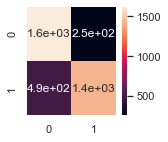

In [179]:
cf_test = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(2,2))
print('Confusion matrix(test)')
print(sns.heatmap(cf_test, annot=True))

Confusion matrix(train)
AxesSubplot(0.125,0.125;0.62x0.755)


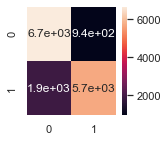

In [180]:
plt.figure(figsize=(2,2))
cf_train = confusion_matrix(y_train, y_predict_train)
print("Confusion matrix(train)")
print(sns.heatmap(cf_train, annot=True))

In [181]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(logit_model, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")

Confusion matrix (test)
[[1625  254]
 [ 490 1430]]
********************************************************************
Confusion matrix (train)
[[6683  935]
 [1860 5717]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1879
           1       0.85      0.74      0.79      1920

    accuracy                           0.80      3799
   macro avg       0.81      0.80      0.80      3799
weighted avg       0.81      0.80      0.80      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      7618
           1       0.86      0.75      0.80      7577

    accuracy                           0.82     15195
   macro avg       0.82      0.82      0.82     15195
weighted avg       0.82      0

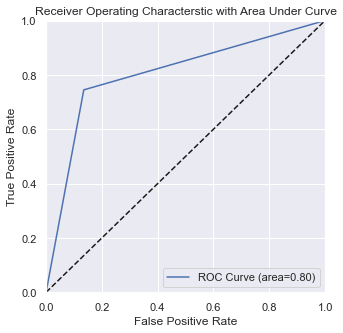

In [182]:
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [183]:
# Grid search cross validation
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logit_model_cv = GridSearchCV(logit_model,grid,cv=10)
logit_model_cv.fit(x_train,y_train)

## Predict Result
y_predict_train_cv = logit_model.predict(x_train)
y_predict_test_cv = logit_model.predict(x_test)

print("tuned hpyerparameters :(best parameters) ",logit_model_cv.best_params_)
print("accuracy :",logit_model_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8146118464363674


In [184]:
# final model for lr
logit_model_cv = LogisticRegression( penalty='l2', C=1.0 )
logit_model_cv.fit(x_train,y_train)

## Predict Result
y_predict_train_cv = logit_model_cv.predict(x_train)
y_predict_test_cv = logit_model_cv.predict(x_test)


Confusion matrix (test)
[[1625  254]
 [ 490 1430]]
********************************************************************
Confusion matrix (train)
[[6683  935]
 [1860 5717]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1879
           1       0.85      0.74      0.79      1920

    accuracy                           0.80      3799
   macro avg       0.81      0.80      0.80      3799
weighted avg       0.81      0.80      0.80      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      7618
           1       0.86      0.75      0.80      7577

    accuracy                           0.82     15195
   macro avg       0.82      0.82      0.82     15195
weighted avg       0.82      0

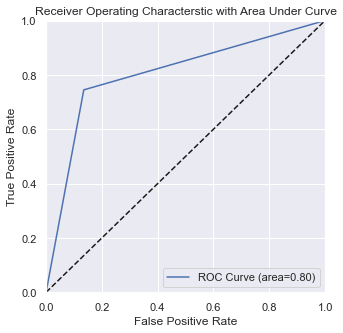

In [185]:
# Evalution after hyperparameter tuning
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test_cv))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train_cv))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_predict_test_cv))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_predict_train_cv))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train_cv))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test_cv))
print("**********************************************************************")
accuracy = cross_val_score(logit_model_cv, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test_cv)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test_cv)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

###  Decision Tree Classifier Model

In [186]:
from sklearn.tree import DecisionTreeClassifier

# Criterion = Gini
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)

# Prediction
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

##### Evalution of Decision Tree Classifier

Confusion matrix (test)
[[1690  189]
 [   9 1911]]
********************************************************************
Confusion matrix (train)
[[7601   17]
 [   2 7575]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1879
           1       0.91      1.00      0.95      1920

    accuracy                           0.95      3799
   macro avg       0.95      0.95      0.95      3799
weighted avg       0.95      0.95      0.95      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7618
           1       1.00      1.00      1.00      7577

    accuracy                           1.00     15195
   macro avg       1.00      1.00      1.00     15195
weighted avg       1.00      1

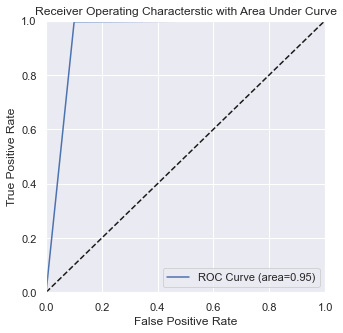

In [187]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_dt_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_dt_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_dt_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_dt_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_dt_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_dt_test))
print("**********************************************************************")
accuracy = cross_val_score(dtree, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
dt_roc_auc = roc_auc_score(y_test, y_pred_dt_test)
print(f"dt_auc_score : {dt_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %dt_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

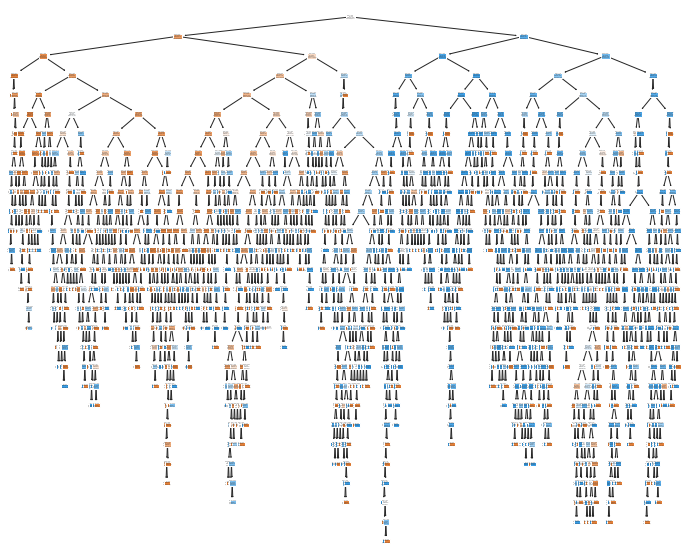

In [188]:
plt.figure(figsize=(12,10))
tree.plot_tree(dtree, filled=True)
plt.show()

In [189]:
# Grid search cross validation

param_grid = {}
dtree_cv = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, verbose=True)
dtree_cv.fit(x_train, y_train)

# predict
y_pred_dt_cv_train = dtree.predict(x_train)
y_pred_dt_cv_test = dtree.predict(x_test)

print("tuned hpyerparameters :(best parameters) ",dtree_cv.best_params_)
print("accuracy :",dtree_cv.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}
accuracy : 0.8396841066140178


In [190]:
# Final model for Decision tree
dtree_cv = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features='auto',
                                 ccp_alpha=0.001)
dtree_cv.fit(x_train, y_train)

# predict
y_pred_dt_cv_train = dtree.predict(x_train)
y_pred_dt_cv_test = dtree.predict(x_test)


Confusion matrix (test)
[[1690  189]
 [   9 1911]]
********************************************************************
Confusion matrix (train)
[[7601   17]
 [   2 7575]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1879
           1       0.91      1.00      0.95      1920

    accuracy                           0.95      3799
   macro avg       0.95      0.95      0.95      3799
weighted avg       0.95      0.95      0.95      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7618
           1       1.00      1.00      1.00      7577

    accuracy                           1.00     15195
   macro avg       1.00      1.00      1.00     15195
weighted avg       1.00      1

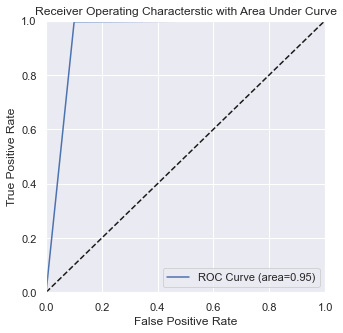

In [191]:
# Evalution after hyperparameter tuning


print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_dt_cv_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_dt_cv_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_dt_cv_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_dt_cv_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_dt_cv_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_dt_cv_test))
print("**********************************************************************")
accuracy = cross_val_score(dtree_cv, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
dt_roc_auc = roc_auc_score(y_test, y_pred_dt_cv_test)
print(f"dt_auc_score : {dt_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_cv_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %dt_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

### RandomForest Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,criterion='entropy', 
                            random_state=111)
rf.fit(x_train, y_train)

# Predict
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

##### Evalution of RandomForest Classifier

Confusion matrix (test)
[[1704  175]
 [   8 1912]]
********************************************************************
Confusion matrix (train)
[[7601   17]
 [   2 7575]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1879
           1       0.92      1.00      0.95      1920

    accuracy                           0.95      3799
   macro avg       0.96      0.95      0.95      3799
weighted avg       0.96      0.95      0.95      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7618
           1       1.00      1.00      1.00      7577

    accuracy                           1.00     15195
   macro avg       1.00      1.00      1.00     15195
weighted avg       1.00      1

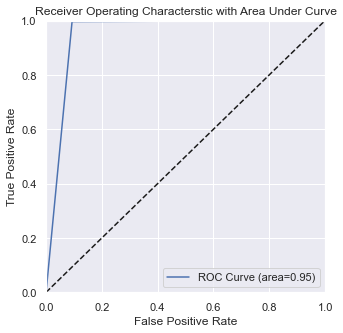

In [193]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_rf_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_rf_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_rf_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_rf_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_rf_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_rf_test))
print("**********************************************************************")
accuracy = cross_val_score(rf, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_test)
print(f"rf_auc_score : {rf_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %rf_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [194]:
# Grid search cross validation
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
rf_cv.fit(x_train, y_train)


# Predict
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

rf_cv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=111)

In [195]:
rf_cv = RandomForestClassifier(n_estimators=200,max_features='auto',max_depth=8,random_state=111)
rf_cv.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=111)

In [196]:
# view the feature scores

importances = rf_cv.feature_importances_
feature_scores = pd.Series(rf_cv.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

PageValues                       0.527545
BounceRates in %                 0.090583
BounceRates_x_PageValues         0.086596
ProductRelated                   0.047194
Allpagecount                     0.045489
Month_Nov                        0.039001
Administrative                   0.032321
quarter                          0.030237
VisitorType_Returning_Visitor    0.015573
TrafficType_agg_2                0.009714
Informational                    0.007959
Month_May                        0.007710
TrafficType_agg_3                0.006673
Month_Dec                        0.006358
OperatingSystems_agg_3           0.006132
TrafficType_agg_13               0.005372
Month_Mar                        0.004236
TrafficType_agg_8                0.004019
OperatingSystems_agg_2           0.002985
Month_Sep                        0.002644
Month_Oct                        0.002567
Weekend                          0.002491
TrafficType_agg_5                0.002364
SpecialDay (probability)_0.8     0

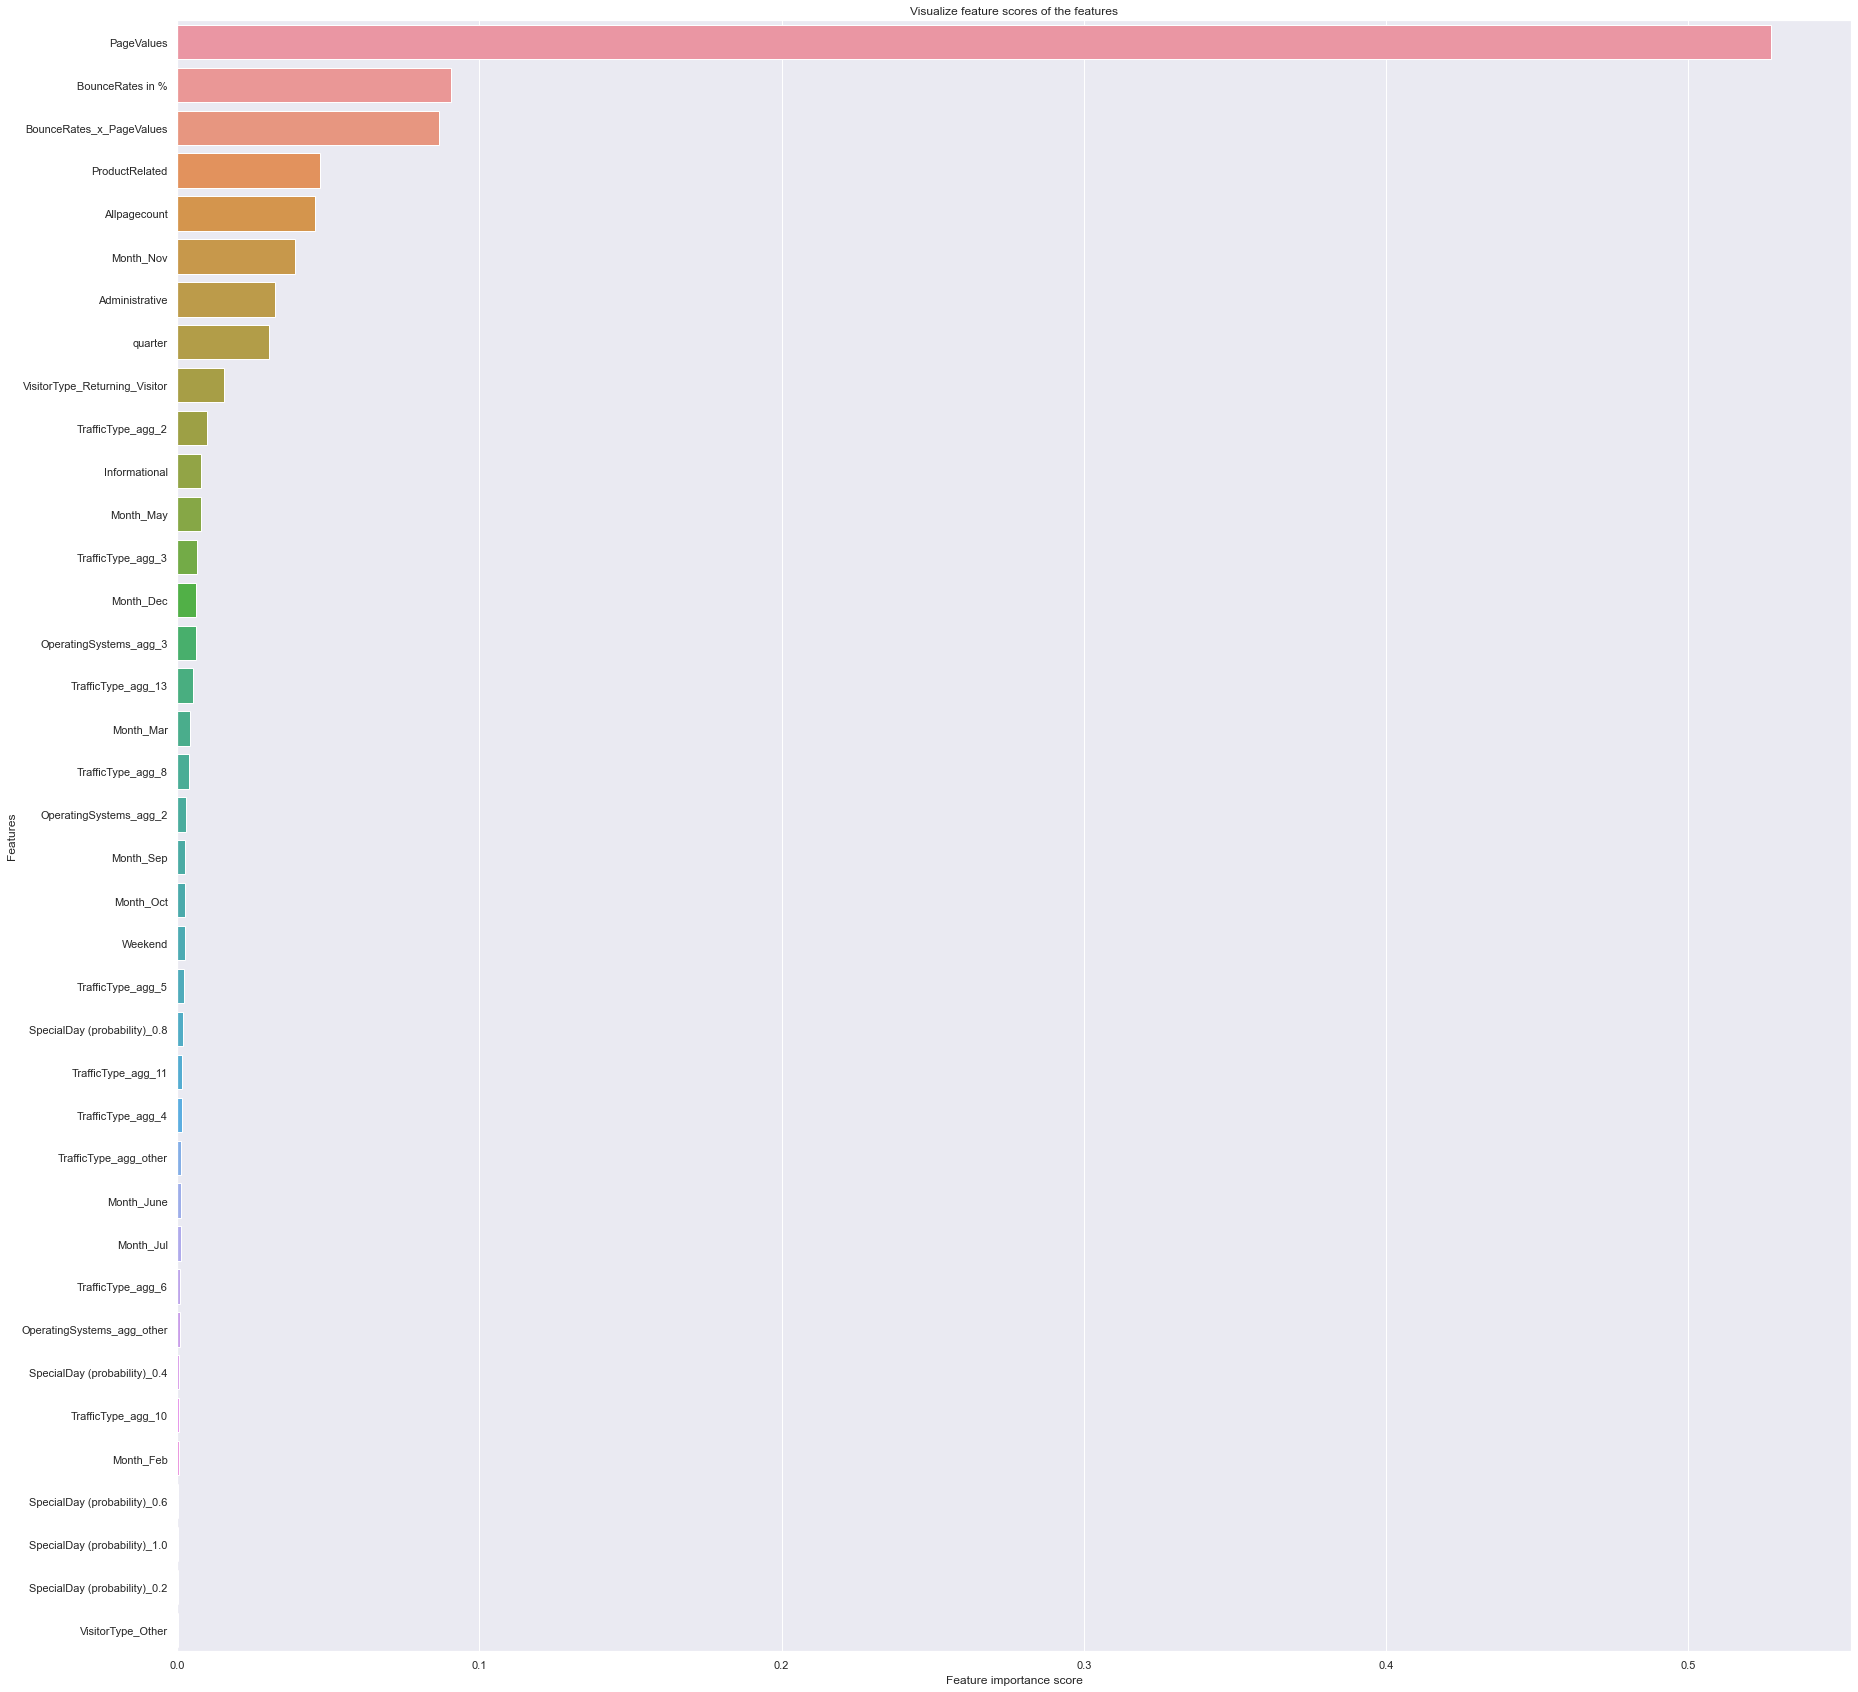

In [197]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 30))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Confusion matrix (test)
[[1704  175]
 [   8 1912]]
********************************************************************
Confusion matrix (train)
[[7601   17]
 [   2 7575]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1879
           1       0.92      1.00      0.95      1920

    accuracy                           0.95      3799
   macro avg       0.96      0.95      0.95      3799
weighted avg       0.96      0.95      0.95      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7618
           1       1.00      1.00      1.00      7577

    accuracy                           1.00     15195
   macro avg       1.00      1.00      1.00     15195
weighted avg       1.00      1

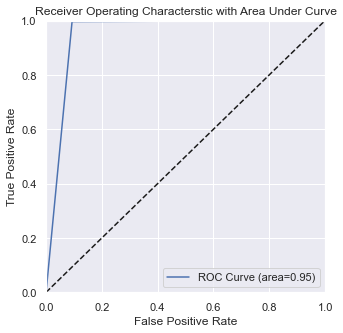

In [198]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_rf_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_rf_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_rf_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_rf_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_rf_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_rf_test))
print("**********************************************************************")
accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
rf_cv_roc_auc = roc_auc_score(y_test, y_pred_rf_test)
print(f"rf_auc_score : {rf_cv_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %rf_cv_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

### Adaboosting Classifier

In [199]:
from sklearn.ensemble import AdaBoostClassifier
adacls = AdaBoostClassifier(n_estimators=50, random_state=1)
adacls.fit(x_train, y_train)

# prediction
y_pred_ada_train = adacls.predict(x_train)
y_pred_ada_test = adacls.predict(x_test)

##### Evalution of Decision Adaboosting Classifier

Confusion matrix (test)
[[1650  229]
 [ 375 1545]]
********************************************************************
Confusion matrix (train)
[[6685  933]
 [1443 6134]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1879
           1       0.87      0.80      0.84      1920

    accuracy                           0.84      3799
   macro avg       0.84      0.84      0.84      3799
weighted avg       0.84      0.84      0.84      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7618
           1       0.87      0.81      0.84      7577

    accuracy                           0.84     15195
   macro avg       0.85      0.84      0.84     15195
weighted avg       0.85      0

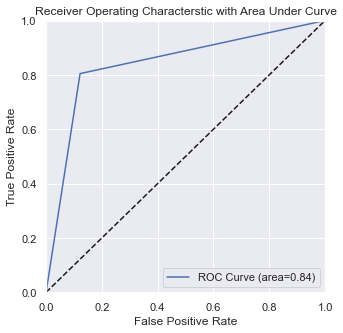

In [200]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_ada_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_ada_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_ada_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_ada_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_ada_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_ada_test))
print("**********************************************************************")
accuracy = cross_val_score(adacls, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
ab_roc_auc = roc_auc_score(y_test, y_pred_ada_test)
print(f"roc_auc_score : {ab_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %ab_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [201]:
# Grid search cross validation
param_grid = { 
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm'   : ['SAMME', 'SAMME.R']
}
adacls_cv = GridSearchCV(estimator=adacls, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
adacls_cv.fit(x_train, y_train)


# Predict
y_pred_ada_train_cv = adacls.predict(x_train)
y_pred_ada_test_cv = adacls.predict(x_test)

adacls_cv.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


AdaBoostClassifier(n_estimators=500, random_state=1)

Confusion matrix (test)
[[1650  229]
 [ 375 1545]]
********************************************************************
Confusion matrix (train)
[[6685  933]
 [1443 6134]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1879
           1       0.87      0.80      0.84      1920

    accuracy                           0.84      3799
   macro avg       0.84      0.84      0.84      3799
weighted avg       0.84      0.84      0.84      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7618
           1       0.87      0.81      0.84      7577

    accuracy                           0.84     15195
   macro avg       0.85      0.84      0.84     15195
weighted avg       0.85      0

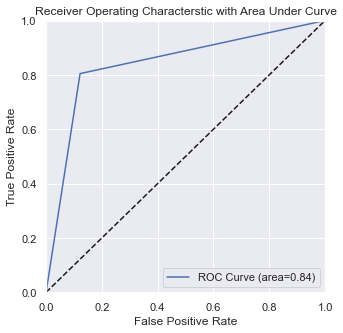

In [202]:
# GridSearch cv
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_ada_test_cv))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_ada_train_cv))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_ada_test_cv))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_ada_train_cv))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_ada_train_cv))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_ada_test_cv))
print("**********************************************************************")
accuracy = cross_val_score(adacls_cv, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
ab_roc_auc = roc_auc_score(y_test, y_pred_ada_test_cv)
print(f"roc_auc_score : {ab_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada_test_cv)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %ab_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting Decision Tree (GBDT)

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gbcls = GradientBoostingClassifier(random_state=1)
gbcls.fit(x_train, y_train)

# Prediction
y_pred_gdb_train = gbcls.predict(x_train)
y_pred_gdb_test = gbcls.predict(x_test)

#### Evalution metrics of  Gradient Boosting Decision Tree (GBDT)

Confusion matrix (test)
[[1596  283]
 [ 237 1683]]
********************************************************************
Confusion matrix (train)
[[6569 1049]
 [ 913 6664]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1879
           1       0.86      0.88      0.87      1920

    accuracy                           0.86      3799
   macro avg       0.86      0.86      0.86      3799
weighted avg       0.86      0.86      0.86      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7618
           1       0.86      0.88      0.87      7577

    accuracy                           0.87     15195
   macro avg       0.87      0.87      0.87     15195
weighted avg       0.87      0

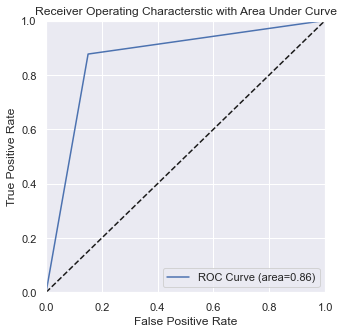

In [204]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_gdb_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_gdb_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_gdb_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_gdb_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_gdb_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_gdb_test))
print("**********************************************************************")
accuracy = cross_val_score(gbcls, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
gb_roc_auc = roc_auc_score(y_test, y_pred_gdb_test)
print(f"roc_auc_score : {gb_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gdb_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %gb_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost 

In [205]:
from xgboost import XGBClassifier
xgb_cls = XGBClassifier()
xgb_cls.fit(x_train, y_train)

# prediction
y_pred_xgb_train = xgb_cls.predict(x_train)
y_pred_xgb_test = xgb_cls.predict(x_test)

#### Evalution metrics of  XGBoost

Confusion matrix (test)
[[1665  214]
 [  87 1833]]
********************************************************************
Confusion matrix (train)
[[7290  328]
 [ 245 7332]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1879
           1       0.90      0.95      0.92      1920

    accuracy                           0.92      3799
   macro avg       0.92      0.92      0.92      3799
weighted avg       0.92      0.92      0.92      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7618
           1       0.96      0.97      0.96      7577

    accuracy                           0.96     15195
   macro avg       0.96      0.96      0.96     15195
weighted avg       0.96      0

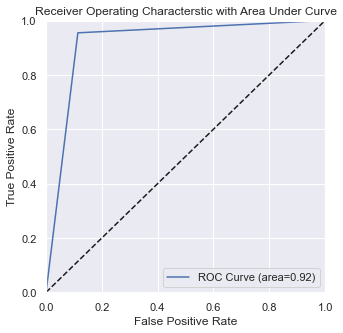

In [206]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_xgb_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_xgb_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_xgb_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_xgb_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_xgb_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_xgb_test))
print("**********************************************************************")
accuracy = cross_val_score(xgb_cls, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb_test)
print(f"roc_auc_score : {xgb_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %xgb_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

### Support Vector Machine

In [207]:
from sklearn.svm import SVC
svm_linear = SVC()
svm_linear.fit(x_train, y_train)

# Prediction
y_pred_svm_lr_train = svm_linear.predict(x_train)
y_pred_svm_lr_test = svm_linear.predict(x_test)

#### Evalution metrics of SVC

Confusion matrix (test)
[[1603  276]
 [ 331 1589]]
********************************************************************
Confusion matrix (train)
[[6696  922]
 [1137 6440]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1879
           1       0.85      0.83      0.84      1920

    accuracy                           0.84      3799
   macro avg       0.84      0.84      0.84      3799
weighted avg       0.84      0.84      0.84      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      7618
           1       0.87      0.85      0.86      7577

    accuracy                           0.86     15195
   macro avg       0.86      0.86      0.86     15195
weighted avg       0.86      0

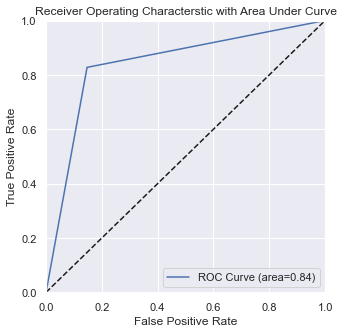

In [208]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_svm_lr_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_svm_lr_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_svm_lr_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train, y_pred_svm_lr_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_svm_lr_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_svm_lr_test))
print("**********************************************************************")
accuracy = cross_val_score(svm_linear, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
svm_roc_auc = roc_auc_score(y_test, y_pred_svm_lr_test)
print(f"roc_auc_score : {svm_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_lr_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %svm_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes Theorem

In [209]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train, y_train)

# prediction
y_pred_nb_train = naive.predict(x_train)
y_pred_nb_test = naive.predict(x_test)

#### Evalution metrics of Naive Bayes Theorem

Confusion matrix (test)
[[ 929  950]
 [ 229 1691]]
********************************************************************
Confusion matrix (train)
[[3854 3764]
 [ 999 6578]]
**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.80      0.49      0.61      1879
           1       0.64      0.88      0.74      1920

    accuracy                           0.69      3799
   macro avg       0.72      0.69      0.68      3799
weighted avg       0.72      0.69      0.68      3799

**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.79      0.51      0.62      7618
           1       0.64      0.87      0.73      7577

    accuracy                           0.69     15195
   macro avg       0.72      0.69      0.68     15195
weighted avg       0.72      0

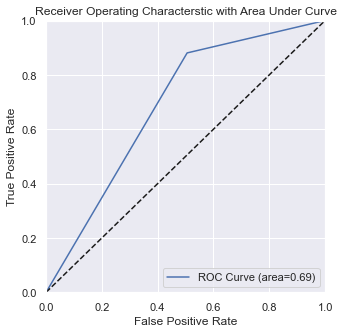

In [210]:
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_pred_nb_test))
print("********************************************************************")
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_pred_nb_train))
print("**********************************************************************")
print("Classification Report(test)")
print(classification_report(y_test, y_pred_nb_test))
print("**********************************************************************")
print('Classification Report(train)')
print(classification_report(y_train,y_pred_nb_train))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_pred_nb_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_pred_nb_test))
print("**********************************************************************")
accuracy = cross_val_score(naive, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
nb_roc_auc = roc_auc_score(y_test, y_pred_nb_test)
print(f"roc_auc_score : {nb_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %nb_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()